# Imports

In [144]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [145]:
data = pd.read_csv('../data/application_train_vf.csv')
# validation = pd.read_csv('./data/application_test_vf.csv')
# bureau = pd.read_csv('./data/bureau.csv')
# credit_card = pd.read_csv('./data/credit_card_balance.csv')
# bureau_balance = pd.read_csv('./data/bureau_balance.csv')
# install_pay = pd.read_csv('./data/installments_payments.csv')
# pos_cash = pd.read_csv('./data/POS_CASH_balance.csv')
# previous_app = pd.read_csv('./data/previous_application.csv')

# Dates

In [146]:
data['date_mensuelle'] = pd.to_datetime(data['date_mensuelle'])

In [147]:
data.head()

Unnamed: 0  SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           0      333721       0         Cash loans           M            Y   
1           1      250254       0         Cash loans           F            N   
2           2      265071       0         Cash loans           F            Y   
3           3      227569       0         Cash loans           F            Y   
4           4      212616       0         Cash loans           F            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  ...  \
0               Y             1          292500.0   1102500.0  ...   
1               Y             0          180000.0    270000.0  ...   
2               N             2           67500.0     80865.0  ...   
3               Y             1          157500.0   1078200.0  ...   
4               N             1          112500.0    225000.0  ...   

   FLAG_DOCUMENT_19  FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0                 0                 0                0   
1                 0                 0                0   
2                 0                 0                0   
3                 0                 0                0   
4                 0                 0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        0.0                       0.0   
4                        0.0                       0.0   

  AMT_REQ_CREDIT_BUREAU_WEEK AMT_REQ_CREDIT_BUREAU_MON  \
0                        0.0                       0.0   
1                        0.0                       1.0   
2                        0.0                       0.0   
3                        0.0                       0.0   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  date_mensuelle  
0                        0.0                         1.0      2013-01-01  
1                        1.0                         5.0      2013-01-01  
2                        0.0                         0.0      2013-01-01  
3                        0.0                         0.0      2013-01-01  
4                        2.0                         0.0      2013-01-01  

[5 rows x 124 columns]

## Study of some datas

cibles : ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START']

In [148]:
data = data[["date_mensuelle",'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', "TARGET"]]
data.head()

date_mensuelle NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0     2013-01-01         Cash loans           M            Y               Y   
1     2013-01-01         Cash loans           F            N               Y   
2     2013-01-01         Cash loans           F            Y               N   
3     2013-01-01         Cash loans           F            Y               Y   
4     2013-01-01         Cash loans           F            N               N   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             1          292500.0   1102500.0      32364.0        1102500.0   
1             0          180000.0    270000.0      10179.0         270000.0   
2             2           67500.0     80865.0       7546.5          67500.0   
3             1          157500.0   1078200.0      38331.0         900000.0   
4             1          112500.0    225000.0      15165.0         225000.0   

   ... FLAG_WORK_PHONE FLAG_CONT_MOBILE FLAG_PHONE FLAG_EMAIL  \
0  ...               0                1          1          0   
1  ...               0                1          1          0   
2  ...               1                1          0          0   
3  ...               0                1          0          0   
4  ...               0                1          1          0   

         OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0                Drivers              3.0                     3   
1  High skill tech staff              2.0                     3   
2               Laborers              4.0                     2   
3            Sales staff              2.0                     1   
4            Sales staff              3.0                     2   

   REGION_RATING_CLIENT_W_CITY  WEEKDAY_APPR_PROCESS_START  TARGET  
0                            3                    THURSDAY       0  
1                            3                    THURSDAY       0  
2                            2                      MONDAY       0  
3                            1                   WEDNESDAY       0  
4                            2                   WEDNESDAY       0  

[5 rows x 33 columns]

# Missing values

## Variables catégorielles

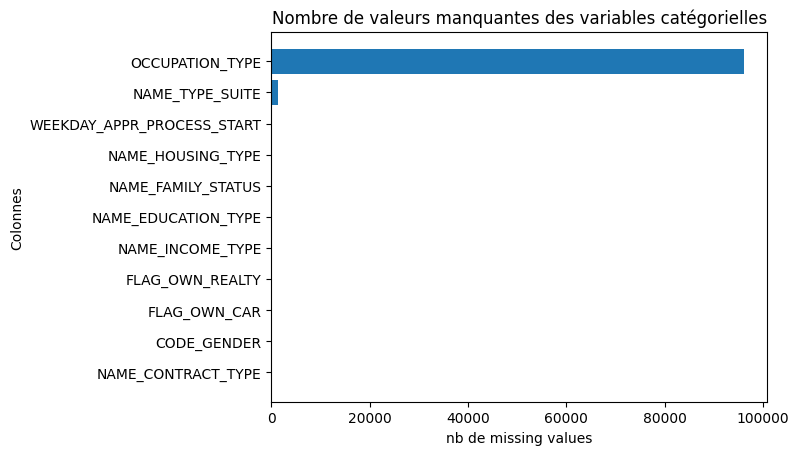

In [149]:
missing_values = data.select_dtypes(include = 'object').isna().sum()

missing_values = missing_values.sort_values(ascending=True)

plt.barh(missing_values.index, missing_values.values)

plt.xlabel('nb de missing values')
plt.ylabel('Colonnes')
plt.title('Nombre de valeurs manquantes des variables catégorielles')

plt.show()

In [150]:
nb_missing = data.isna().sum()/data.shape[0]*100

for i in data.columns:
    if nb_missing[i] > 1:
        print(i, nb_missing[i])
        #if nb_missing[i] > 30:
           # print("Suppression de la colonne")
           # data = data.drop(i, axis = 1)

OWN_CAR_AGE 65.97758300202217
OCCUPATION_TYPE 31.377590189051542


## Variables indicatrices

CNT_CHILDREN                   0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_ID_PUBLISH                0
FLAG_MOBIL                     0
FLAG_EMP_PHONE                 0
FLAG_WORK_PHONE                0
FLAG_CONT_MOBILE               0
FLAG_PHONE                     0
FLAG_EMAIL                     0
REGION_RATING_CLIENT           0
REGION_RATING_CLIENT_W_CITY    0
TARGET                         0
dtype: int64


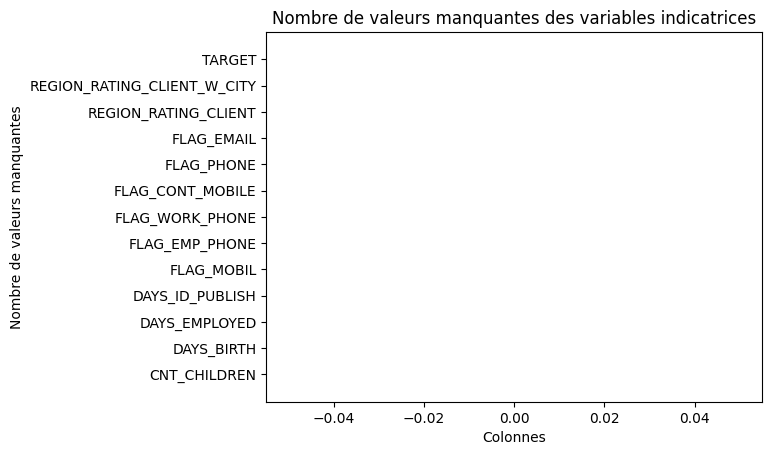

In [151]:
missing_values = data.select_dtypes(include = 'int').isna().sum()

missing_values = missing_values.sort_values(ascending=True)
print(missing_values)
plt.barh(missing_values.index, missing_values.values)

plt.xlabel('Colonnes')
plt.ylabel('Nombre de valeurs manquantes')
plt.title('Nombre de valeurs manquantes des variables indicatrices')

plt.show()

## Variables continues

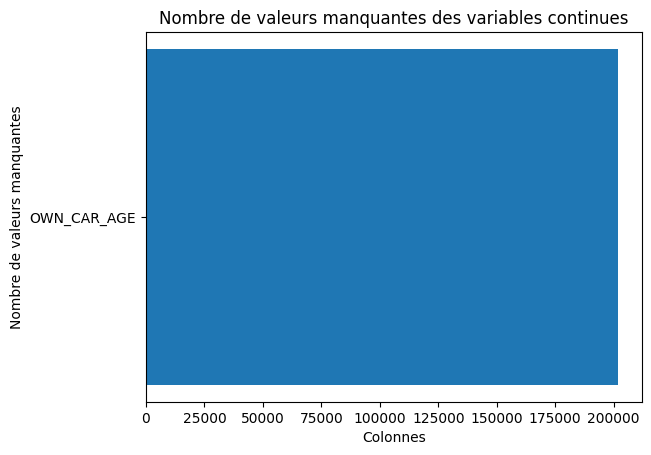

In [152]:
missing_values = data.select_dtypes(include = 'float').isna().sum()

missing_values = missing_values[missing_values>155000]

missing_values = missing_values.sort_values(ascending=True)

plt.barh(missing_values.index, missing_values.values)

plt.xlabel('Colonnes')
plt.ylabel('Nombre de valeurs manquantes')
plt.title('Nombre de valeurs manquantes des variables continues')

plt.show()

In [153]:
data

date_mensuelle NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0          2013-01-01         Cash loans           M            Y   
1          2013-01-01         Cash loans           F            N   
2          2013-01-01         Cash loans           F            Y   
3          2013-01-01         Cash loans           F            Y   
4          2013-01-01         Cash loans           F            N   
...               ...                ...         ...          ...   
306102     2020-12-01         Cash loans           F            N   
306103     2020-12-01         Cash loans           F            N   
306104     2020-12-01         Cash loans           F            N   
306105     2020-12-01         Cash loans           M            N   
306106     2020-12-01         Cash loans           M            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0                    Y             1          292500.0   1102500.0   
1                    Y             0          180000.0    270000.0   
2                    N             2           67500.0     80865.0   
3                    Y             1          157500.0   1078200.0   
4                    N             1          112500.0    225000.0   
...                ...           ...               ...         ...   
306102               N             0          148500.0    669600.0   
306103               Y             0           90000.0    312768.0   
306104               Y             0          157500.0   1724220.0   
306105               Y             0           63000.0    177768.0   
306106               N             2          135000.0    592560.0   

        AMT_ANNUITY  AMT_GOODS_PRICE  ... FLAG_WORK_PHONE FLAG_CONT_MOBILE  \
0           32364.0        1102500.0  ...               0                1   
1           10179.0         270000.0  ...               0                1   
2            7546.5          67500.0  ...               1                1   
3           38331.0         900000.0  ...               0                1   
4           15165.0         225000.0  ...               0                1   
...             ...              ...  ...             ...              ...   
306102      32341.5         598500.0  ...               0                1   
306103      22374.0         270000.0  ...               0                1   
306104      45612.0        1350000.0  ...               0                1   
306105       9216.0         135000.0  ...               0                1   
306106      32274.0         450000.0  ...               1                1   

       FLAG_PHONE FLAG_EMAIL        OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0               1          0                Drivers              3.0   
1               1          0  High skill tech staff              2.0   
2               0          0               Laborers              4.0   
3               0          0            Sales staff              2.0   
4               1          0            Sales staff              3.0   
...           ...        ...                    ...              ...   
306102          0          0                    NaN              2.0   
306103          0          0          Cooking staff              1.0   
306104          1          0                    NaN              2.0   
306105          0          0                    NaN              2.0   
306106          0          0               Laborers              4.0   

        REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                          3                            3   
1                          3                            3   
2                          2                            2   
3                          1                            1   
4                          2                            2   
...                      ...                          ...   
306102                     3                            3   
306103                     2                   

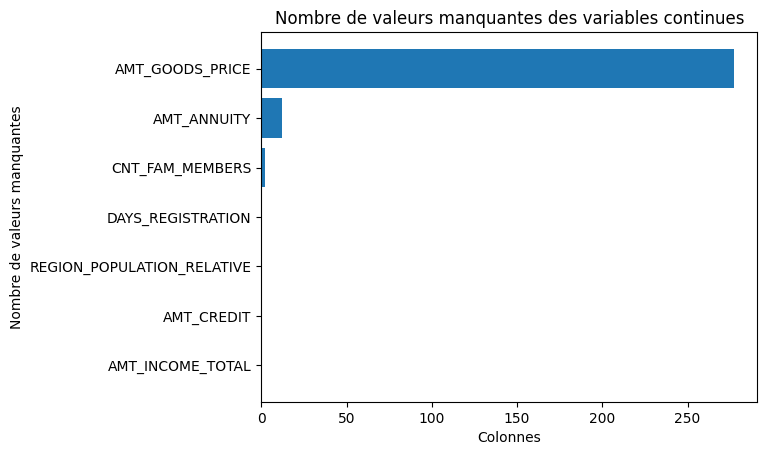

In [154]:
missing_values = data.select_dtypes(include = 'float').isna().sum()

missing_values = missing_values[missing_values<155000]

missing_values = missing_values.sort_values(ascending=True)

plt.barh(missing_values.index, missing_values.values)

plt.xlabel('Colonnes')
plt.ylabel('Nombre de valeurs manquantes')
plt.title('Nombre de valeurs manquantes des variables continues')

plt.show()

In [155]:
nb_missing = missing_values/data.shape[0]*100
nb_missing

AMT_INCOME_TOTAL              0.000000
AMT_CREDIT                    0.000000
REGION_POPULATION_RELATIVE    0.000000
DAYS_REGISTRATION             0.000000
CNT_FAM_MEMBERS               0.000653
AMT_ANNUITY                   0.003920
AMT_GOODS_PRICE               0.090491
dtype: float64

# Variables categorielles

In [156]:
for col in data.select_dtypes(include ='object').columns:
    print(f"{col} : {data[col].nunique()} catégories différentes")
print('On va pouvoir les One Hot Encoder :)')

NAME_CONTRACT_TYPE : 2 catégories différentes
CODE_GENDER : 3 catégories différentes
FLAG_OWN_CAR : 2 catégories différentes
FLAG_OWN_REALTY : 2 catégories différentes
NAME_TYPE_SUITE : 7 catégories différentes
NAME_INCOME_TYPE : 8 catégories différentes
NAME_EDUCATION_TYPE : 5 catégories différentes
NAME_FAMILY_STATUS : 6 catégories différentes
NAME_HOUSING_TYPE : 6 catégories différentes
OCCUPATION_TYPE : 18 catégories différentes
WEEKDAY_APPR_PROCESS_START : 7 catégories différentes
On va pouvoir les One Hot Encoder :)


# Variables numériques

/Users/SamuelLP/Desktop/git/Challenge_Nexialog/.nexialog_venv/lib/python3.10/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/Users/SamuelLP/Desktop/git/Challenge_Nexialog/.nexialog_venv/lib/python3.10/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/Users/SamuelLP/Desktop/git/Challenge_Nexialog/.nexialog_venv/lib/python3.10/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/Users/SamuelLP/Desktop/git/Challenge_Nexialog/.nexialog_venv/lib/python3.10/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGr

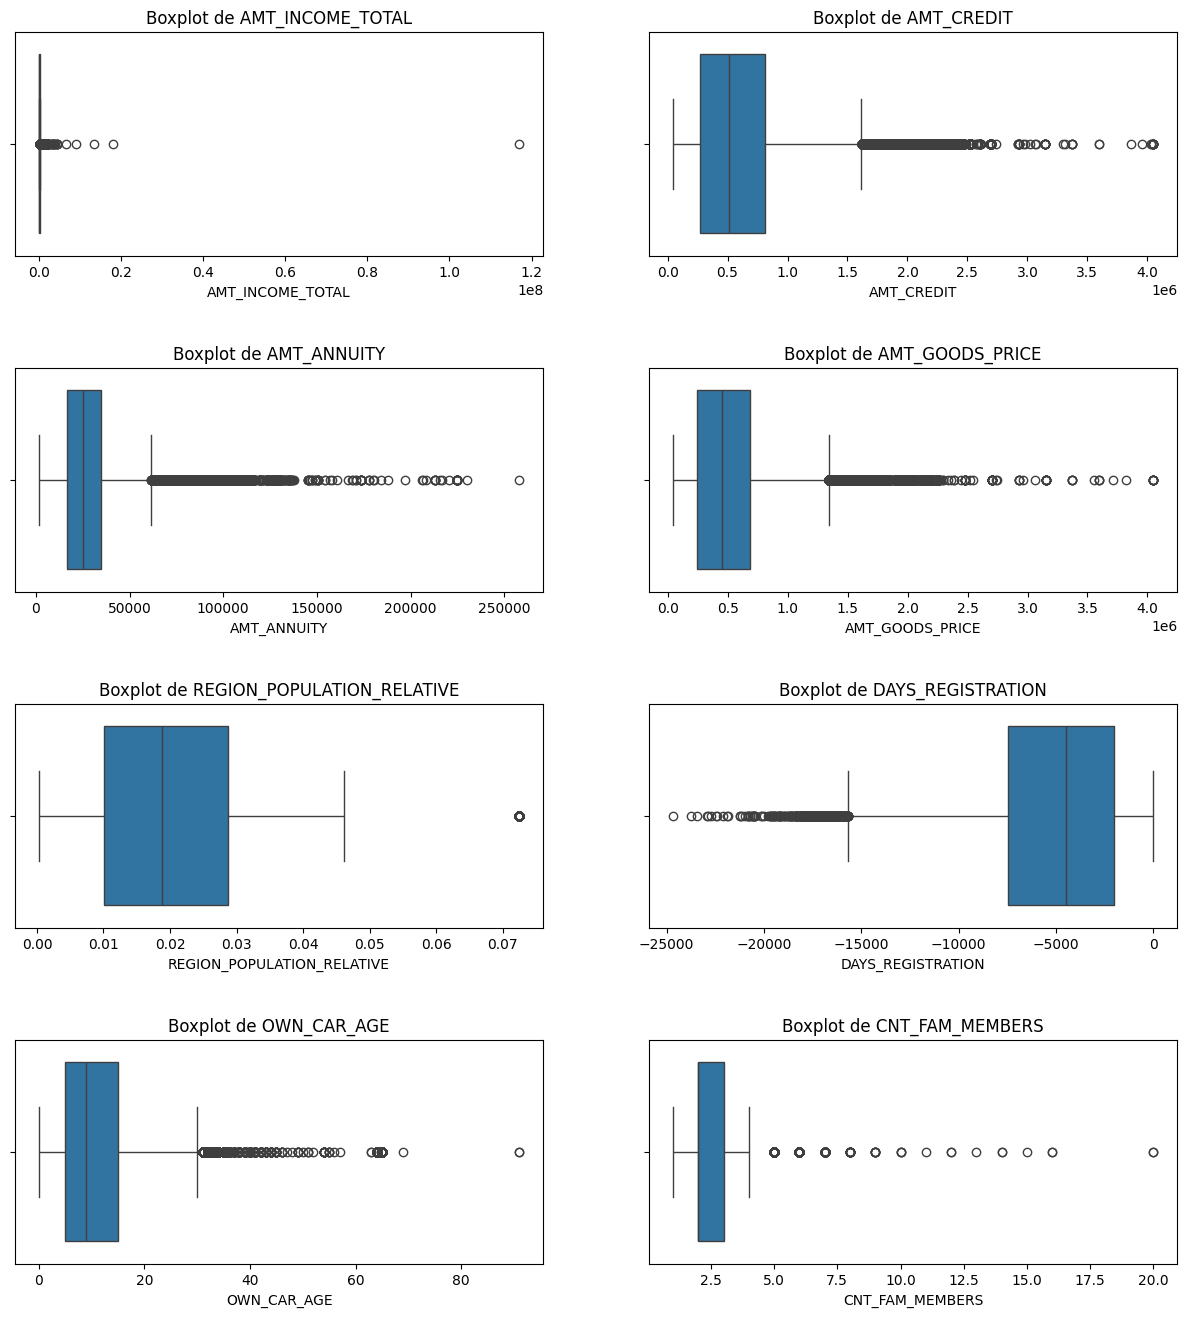

In [157]:
float_columns = data.select_dtypes(include='float').columns

num_cols = 2
num_rows = (len(float_columns) + 1) // 2  # Ajoutez 1 pour gérer les cas impairs

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 4 * num_rows))

fig.subplots_adjust(hspace=0.5)

axes = axes.flatten()

for i, col in enumerate(float_columns):
    sns.boxplot(x=data[col], ax=axes[i])
    axes[i].set_title(f'Boxplot de {col}')

plt.show()

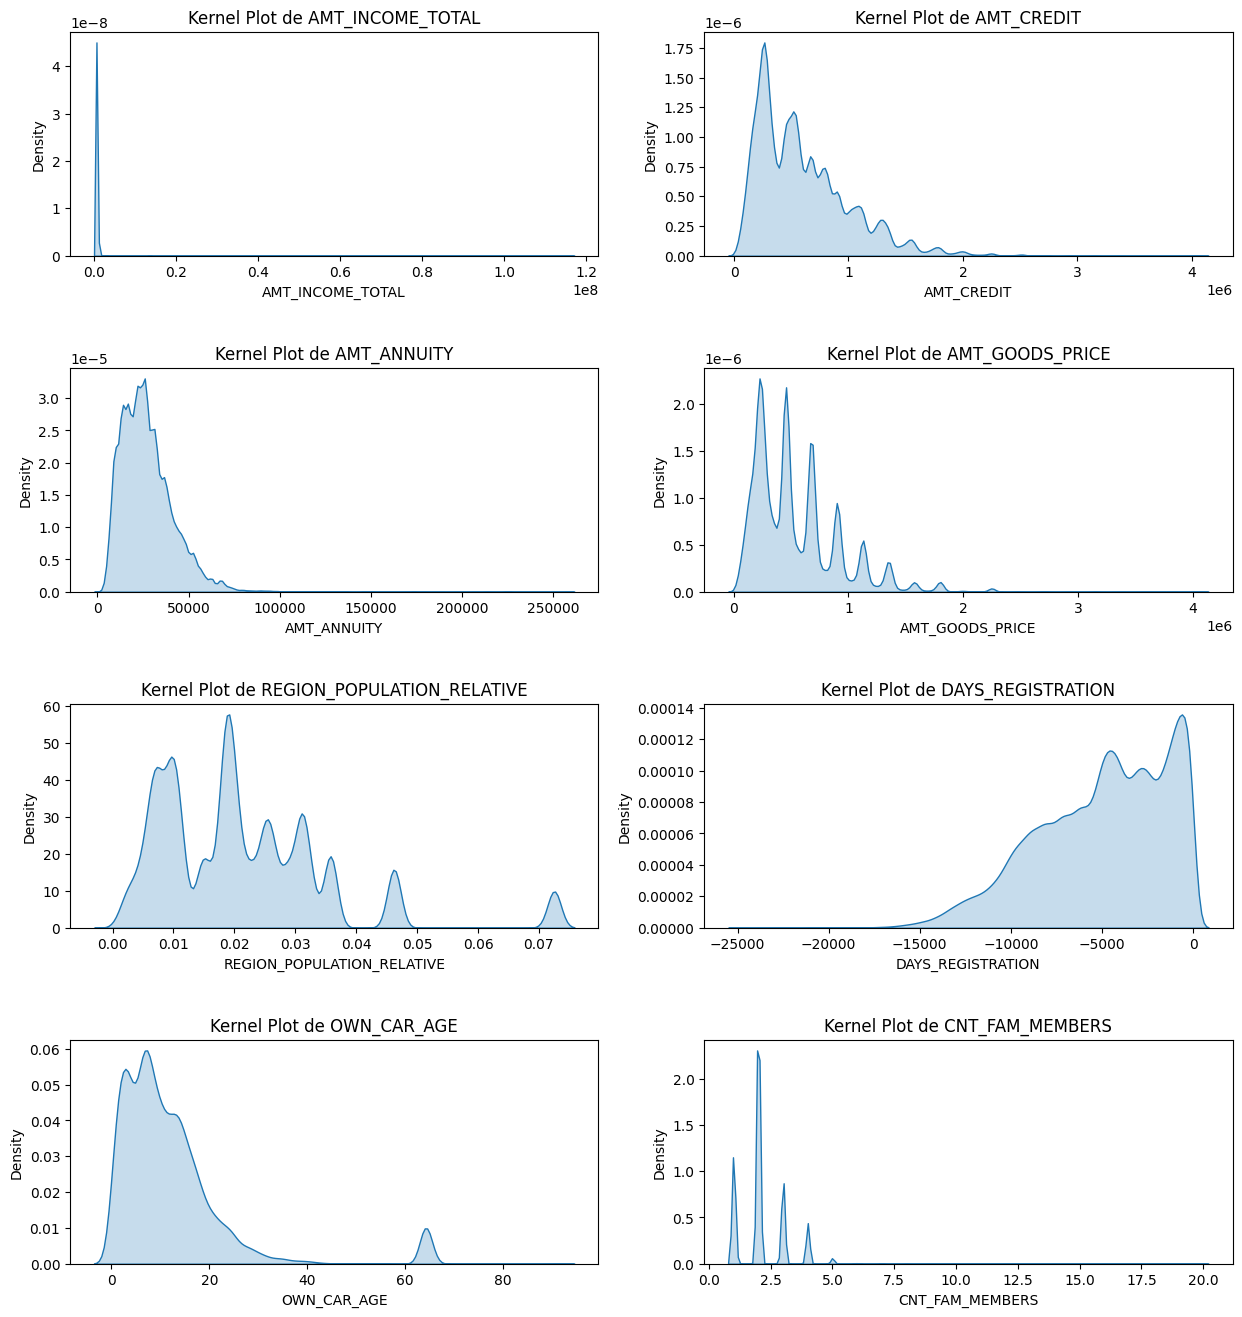

In [158]:
float_columns = data.select_dtypes(include='float').columns

num_cols = 2
num_rows = (len(float_columns) + 1) // 2  # Ajoutez 1 pour gérer les cas impairs

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 4 * num_rows))

fig.subplots_adjust(hspace=0.5)

axes = axes.flatten()

for i, col in enumerate(float_columns):
    sns.kdeplot(x=data[col], ax=axes[i], fill=True)
    axes[i].set_title(f'Kernel Plot de {col}')

plt.show()

# Corrélations entre variables numériques

In [159]:
import numpy as np
corr_matrix = data.select_dtypes(include='number').corr(method='spearman')

In [160]:
col_corr = np.transpose(corr_matrix[np.abs(corr_matrix['TARGET'])>0.05]).columns
corr = corr_matrix.loc[col_corr,col_corr]

## Discrétisation

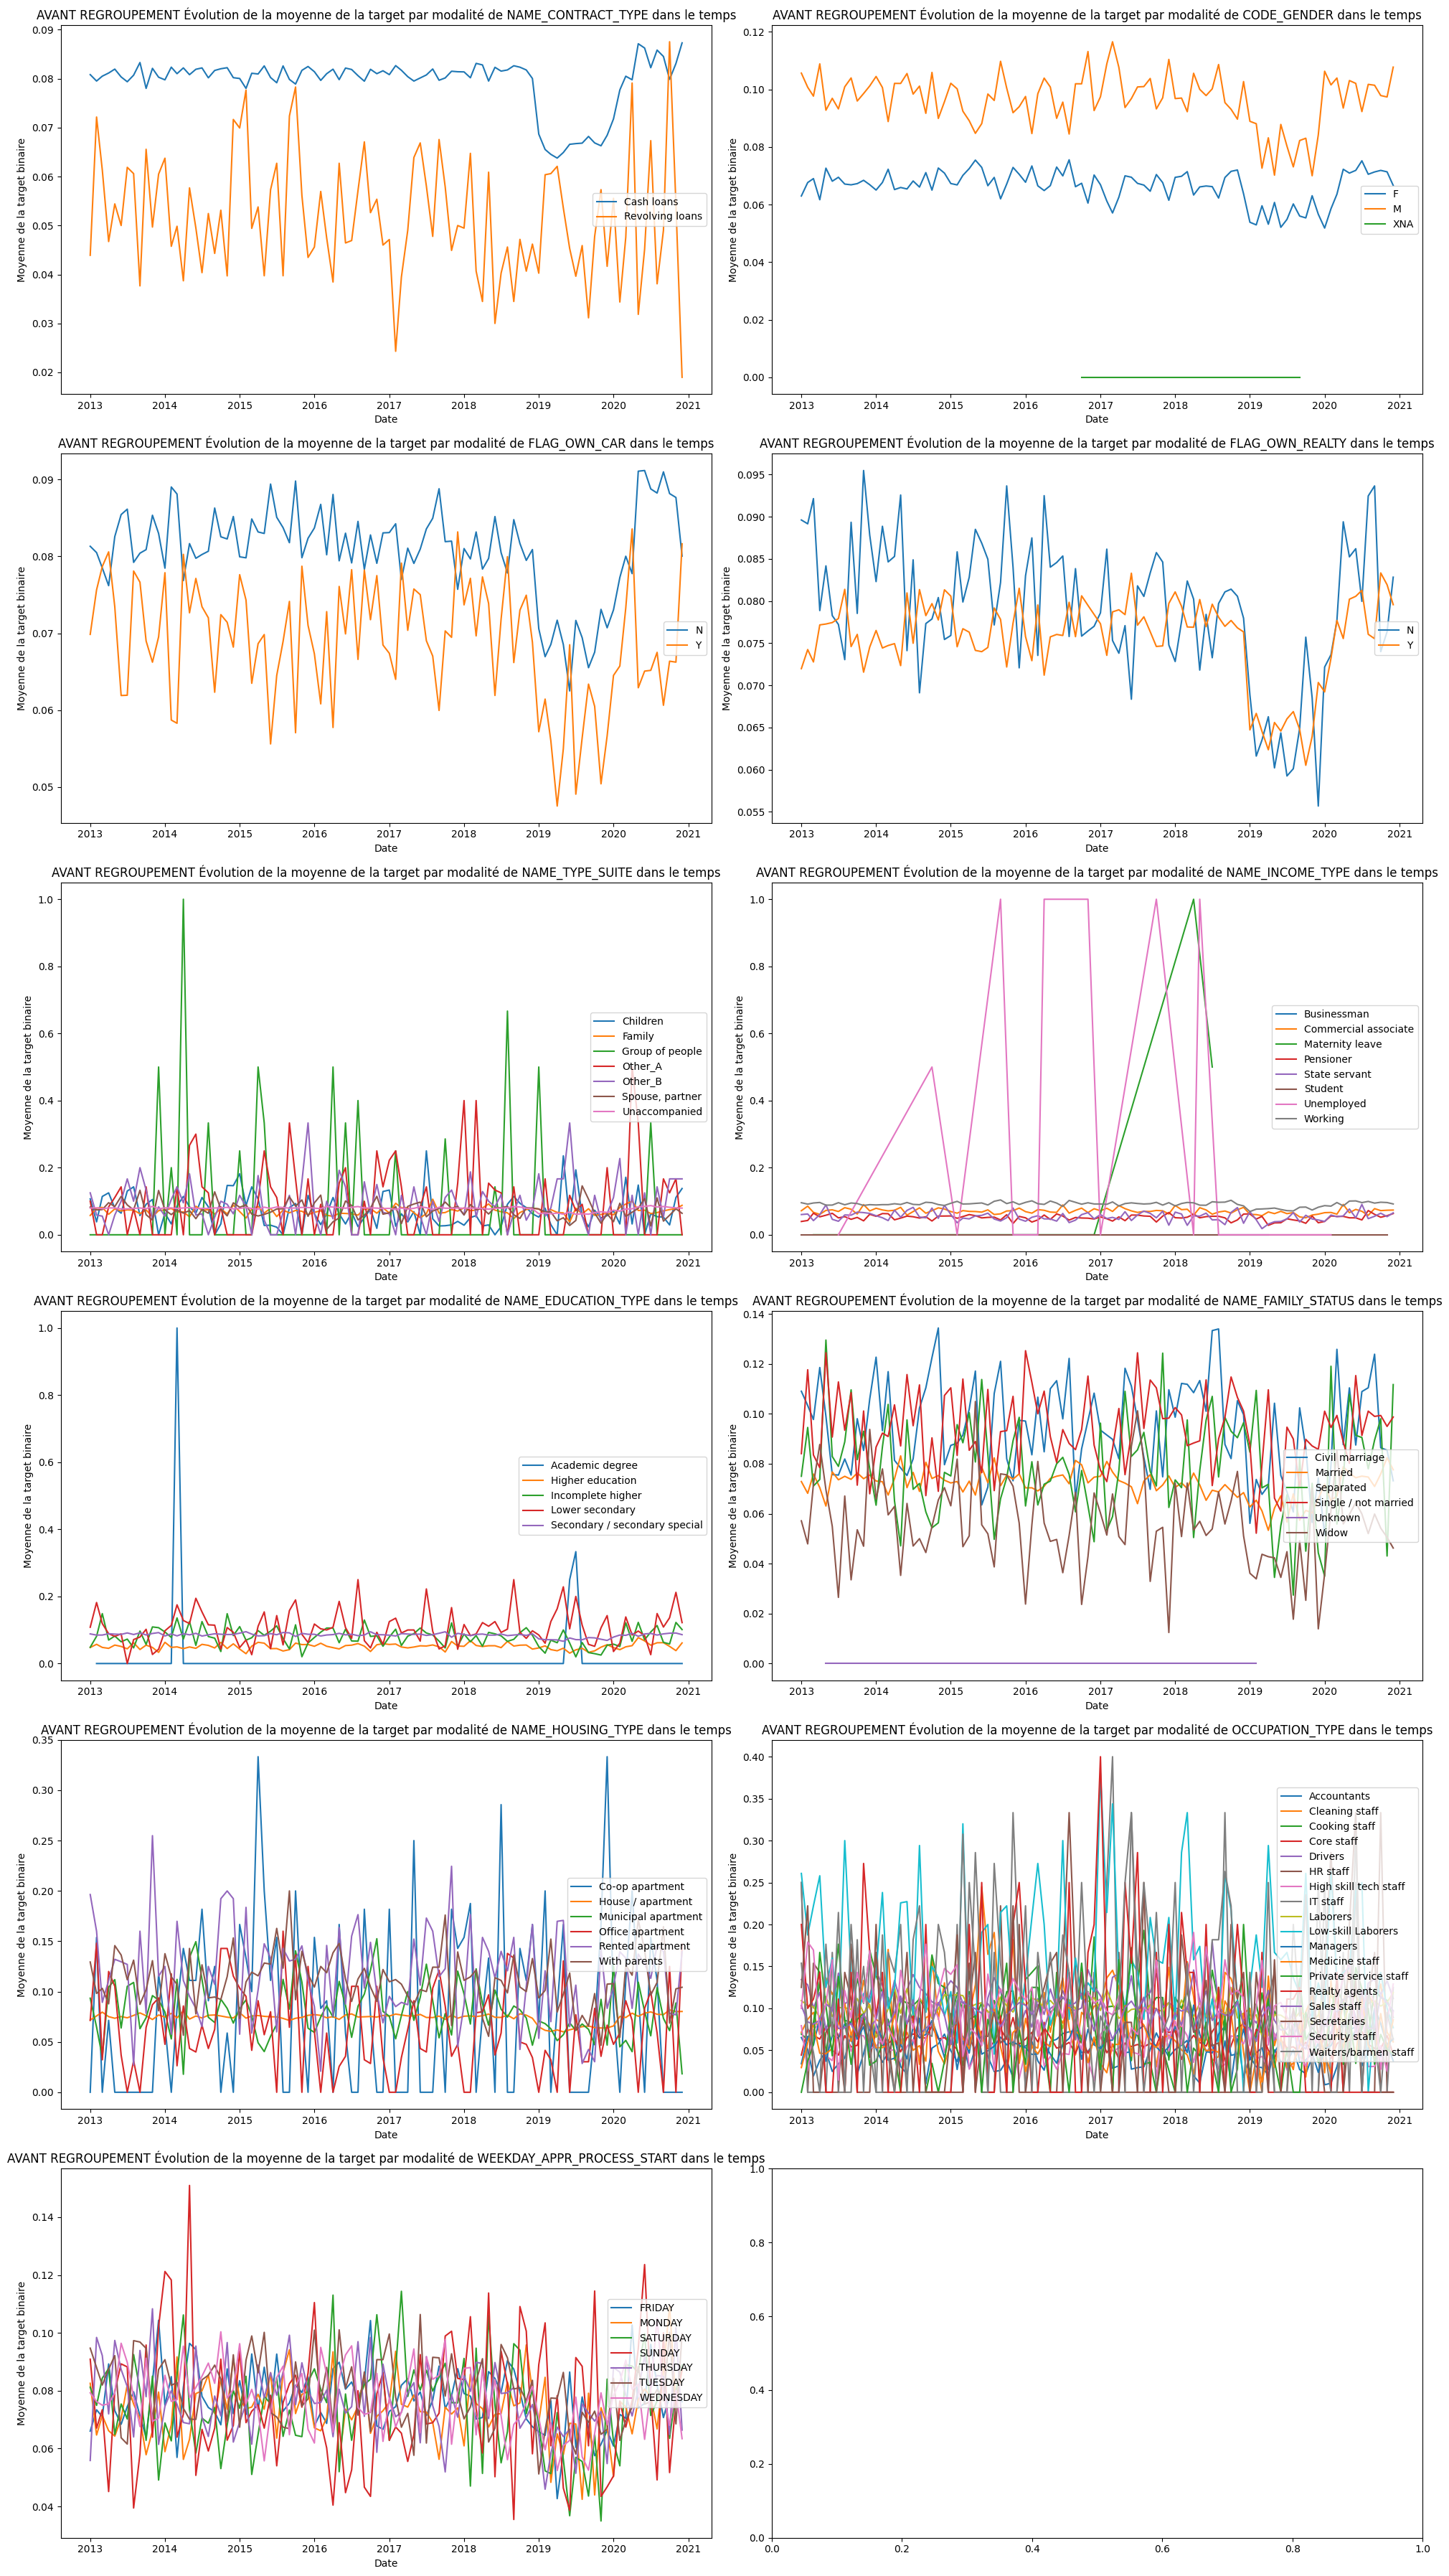

In [161]:
import matplotlib.pyplot as plt

n_cols = 2 
n_rows = (len(data.select_dtypes(include='object').columns) + 1) // n_cols

fig, axs = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(20, 6 * n_rows))

for idx, col in enumerate(data.select_dtypes(include='object').columns):

    result = data.groupby([col, 'date_mensuelle'])['TARGET'].mean().reset_index()
    
    ax = axs[idx // n_cols, idx % n_cols]

    for genre, group in result.groupby(f'{col}'):
        ax.plot(group['date_mensuelle'], group['TARGET'], label=f'{genre}')
    
    ax.legend(loc='right')
    ax.set_xlabel('Date')
    ax.set_ylabel('Moyenne de la target binaire')
    ax.set_title(f'AVANT REGROUPEMENT Évolution de la moyenne de la target par modalité de {col} dans le temps')

plt.tight_layout()
plt.show()



variables ok :
- NAME_CONTRACT_TYPE
- CODE_GENDER
- FLAG_OWN_CAR

variable à discrétiser : 
- NAME_TYPE_SUITE
- NAME_EDUCATION_TYPE
- NAME_FAMILY_STATUS
- NAME_HOUSING_TYPE
- OCCUPATION_TYPE
- WEEKDAY_APPR_PROCESS_START

# TODO
- faire par les moyennes
- 4 mod par moyenne max
- regarder répartition des catégories

### Faire par les moyennes - variables catégorielles
cols = ["NAME_TYPE_SUITE","NAME_INCOME_TYPE","NAME_EDUCATION_TYPE", "NAME_FAMILY_STATUS", "NAME_HOUSING_TYPE", "OCCUPATION_TYPE", 'WEEKDAY_APPR_PROCESS_START']


## NAME_TYPE_SUITE

In [162]:
list_mean = []
for cat in data['NAME_TYPE_SUITE'].unique():
    moyenne = data[data['NAME_TYPE_SUITE']==cat]['TARGET'].mean()
    list_mean.append(moyenne)
    
motif = pd.DataFrame(list_mean, columns=['moyenne'])
motif['family'] = data['NAME_TYPE_SUITE'].unique()
motif.sort_values(ascending=False, by = 'moyenne', inplace=True)
motif.dropna(inplace=True)
motif.reset_index(drop=True, inplace=True)
motif

moyenne           family
0  0.092666          Other_B
1  0.081481  Group of people
2  0.081395          Other_A
3  0.077876    Unaccompanied
4  0.074571  Spouse, partner
5  0.070705           Family
6  0.070089         Children

In [163]:
other = ['Other_B' , 'Group of people', 'Other_A']
alone = ["Unaccompanied"]  
not_alone = ['Spouse, partner', 'Family', 'Children']

data['Situation'] = np.select(
    [
        data['NAME_TYPE_SUITE'].isin(other),
        data['NAME_TYPE_SUITE'].isin(alone),
        data['NAME_TYPE_SUITE'].isin(not_alone)
    ],
    ['other', 'alone', 'not_alone'],
    default='other')

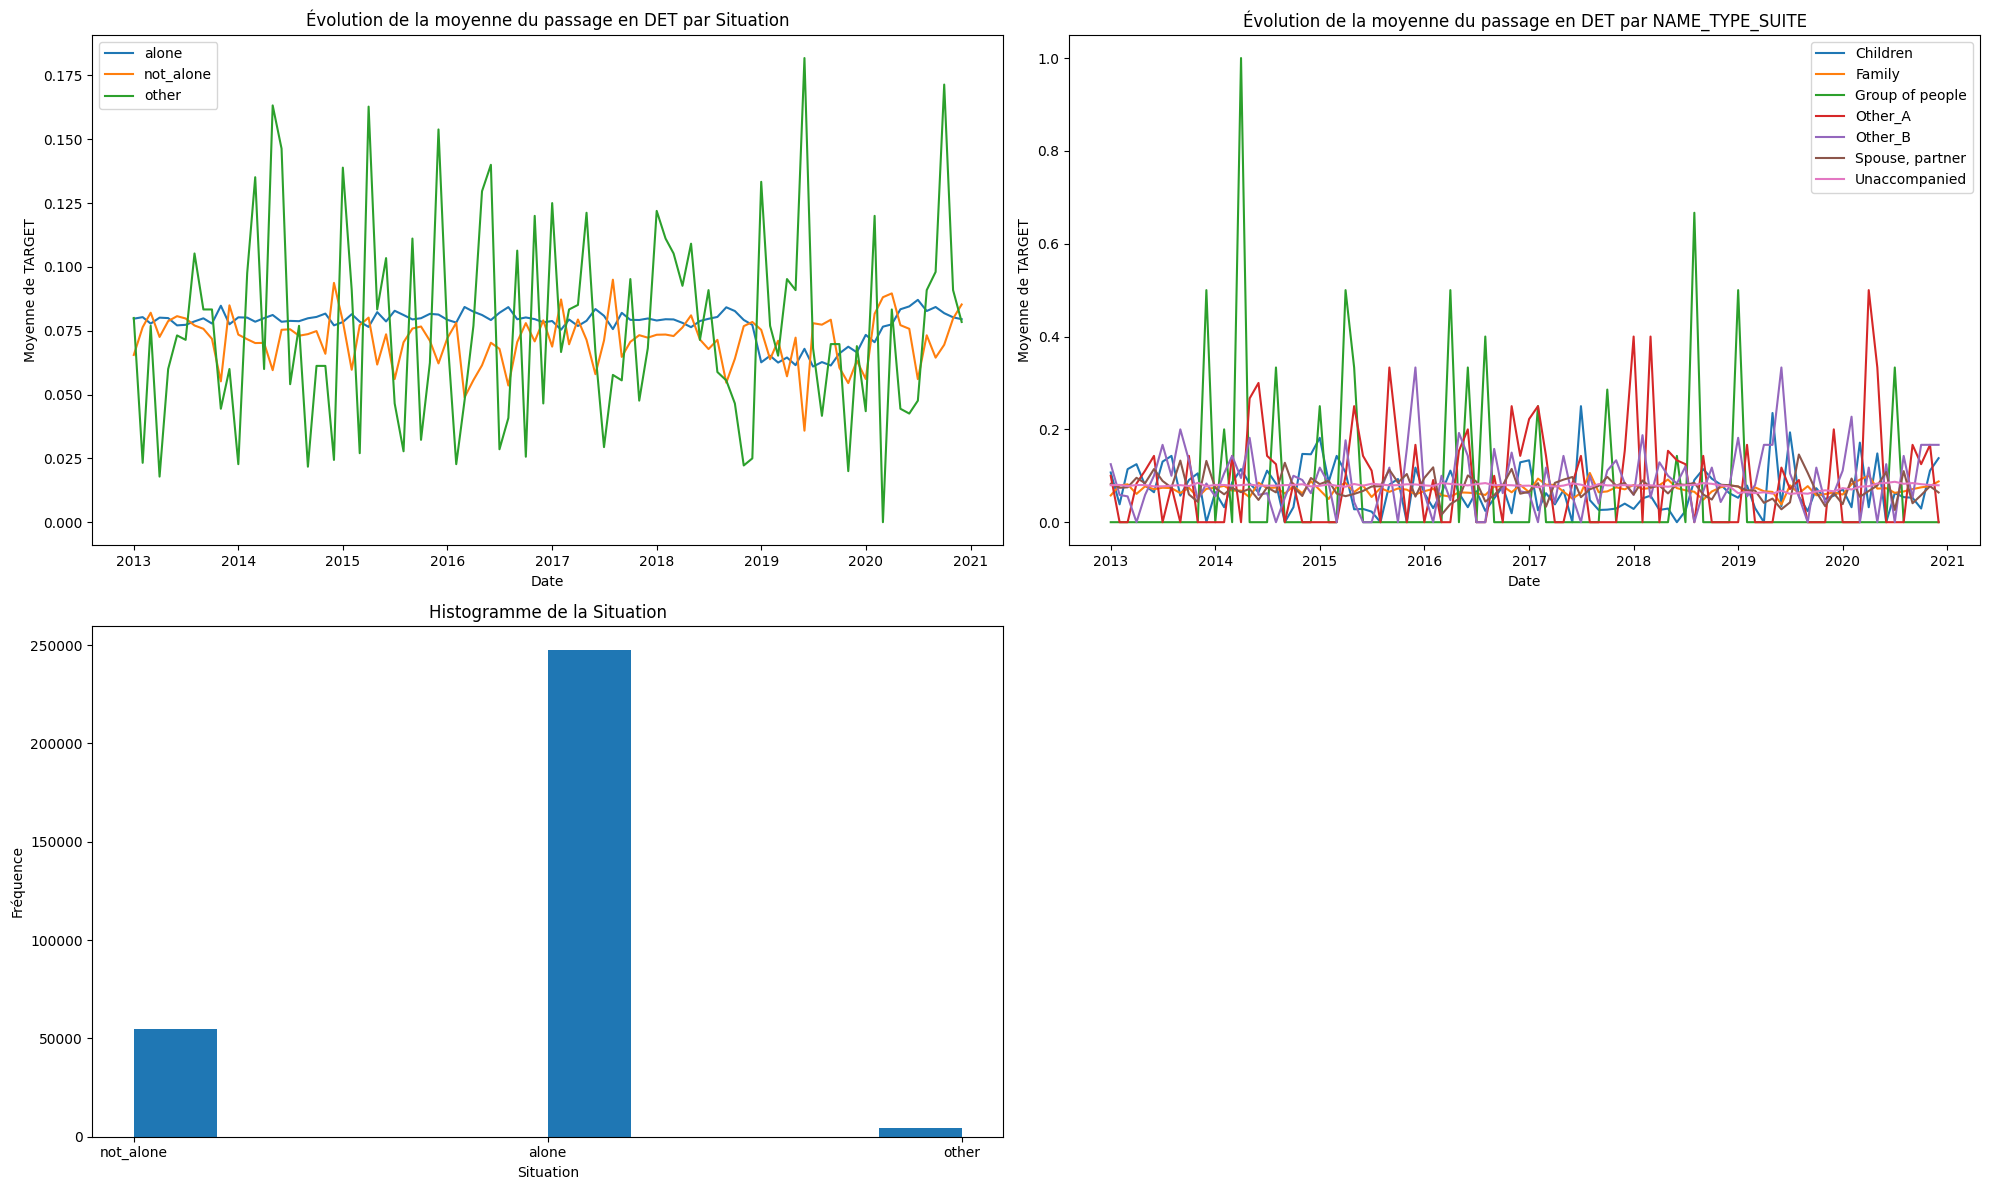

In [164]:
import matplotlib.pyplot as plt

# Création d'une grille de subplots avec 2 lignes et 2 colonnes
# Les deux premiers subplots (en haut) pour les courbes, et le troisième (en bas à gauche) pour l'histogramme
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 12))
axes[1, 1].axis('off')  # Désactiver le quatrième subplot (en bas à droite)

for idx, col in enumerate(data[['Situation', 'NAME_TYPE_SUITE']].columns):
    result = data.groupby([col, 'date_mensuelle'])['TARGET'].mean().reset_index()
   
    for genre, group in result.groupby(col):
        axes[0, idx].plot(group['date_mensuelle'], group['TARGET'], label=genre)
    
    axes[0, idx].legend()
    axes[0, idx].set_xlabel('Date')
    axes[0, idx].set_ylabel('Moyenne de TARGET')
    axes[0, idx].set_title(f'Évolution de la moyenne du passage en DET par {col}')

# Histogramme pour la 'Situation' dans le troisième subplot (en bas à gauche)
axes[1, 0].hist(data["Situation"])
axes[1, 0].set_title('Histogramme de la Situation')
axes[1, 0].set_xlabel('Situation')
axes[1, 0].set_ylabel('Fréquence')

plt.tight_layout()
plt.show()


## NAME_INCOME_TYPE

In [165]:
list_mean = []
for cat in data['NAME_INCOME_TYPE'].unique():
    moyenne = data[data['NAME_INCOME_TYPE']==cat]['TARGET'].mean()
    list_mean.append(moyenne)
    
motif = pd.DataFrame(list_mean, columns=['moyenne'])
motif['INCOME'] = data['NAME_INCOME_TYPE'].unique()
motif.sort_values(ascending=False, by = 'moyenne', inplace=True)
motif.dropna(inplace=True)
motif.reset_index(drop=True, inplace=True)
motif

moyenne                INCOME
0  0.400000       Maternity leave
1  0.363636            Unemployed
2  0.091305               Working
3  0.070689  Commercial associate
4  0.054736         State servant
5  0.051256             Pensioner
6  0.000000               Student
7  0.000000           Businessman

In [166]:
low_income = ['Maternity leave' , 'Unemployed']
high_income = ["Working", "Commercial associate", "Businessman"]
other = ['State servant', 'Pensioner', 'Student']

data['INCOME'] = np.select(
    [
        data['NAME_INCOME_TYPE'].isin(low_income),
        data['NAME_INCOME_TYPE'].isin(high_income),
        data['NAME_INCOME_TYPE'].isin(other)
    ],
    ['low_income', 'high_income', 'other'],
    default='other')

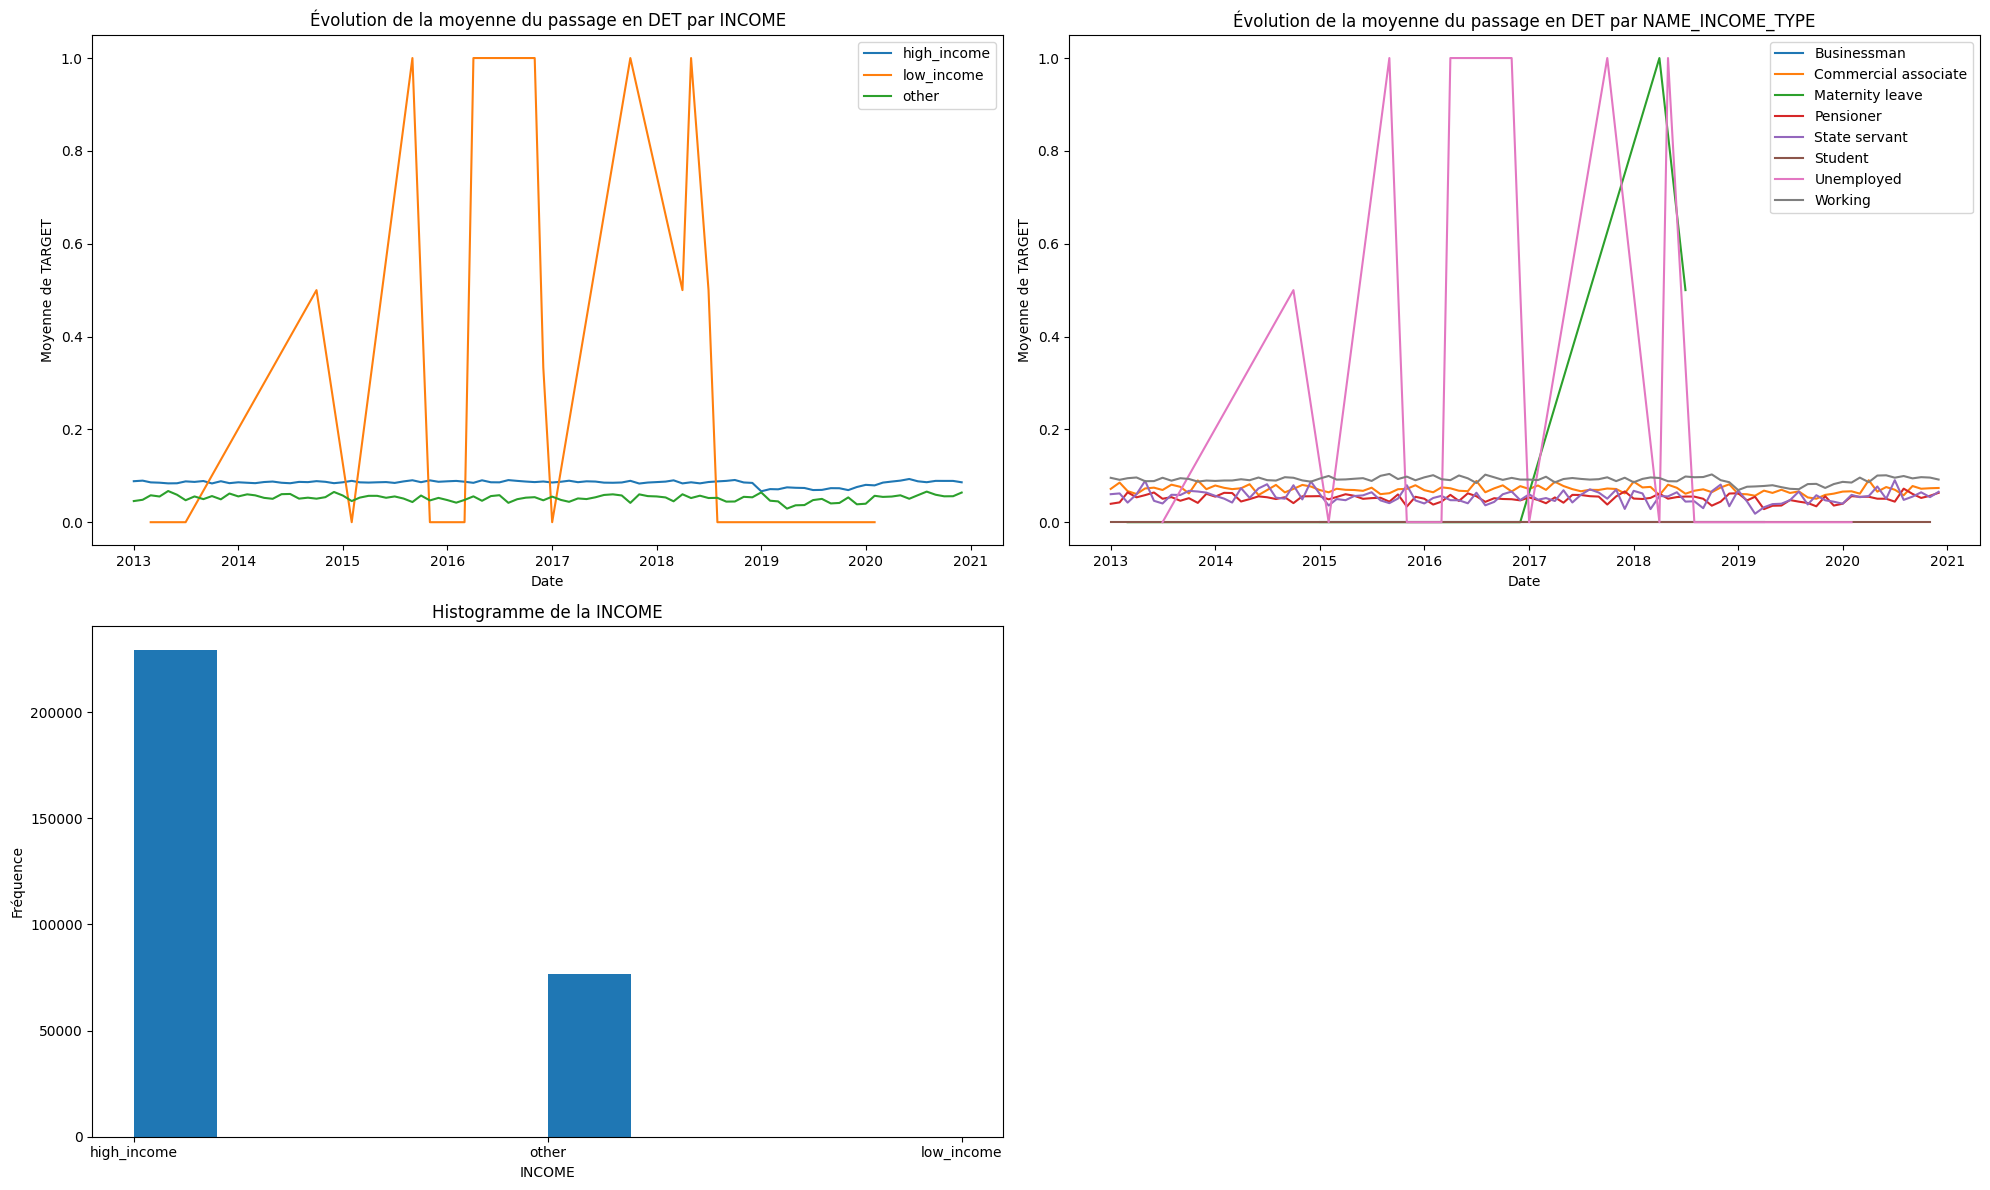

In [167]:
import matplotlib.pyplot as plt

# Création d'une grille de subplots avec 2 lignes et 2 colonnes
# Les deux premiers subplots (en haut) pour les courbes, et le troisième (en bas à gauche) pour l'histogramme
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 12))
axes[1, 1].axis('off')  # Désactiver le quatrième subplot (en bas à droite)

for idx, col in enumerate(data[['INCOME', 'NAME_INCOME_TYPE']].columns):
    result = data.groupby([col, 'date_mensuelle'])['TARGET'].mean().reset_index()
   
    for genre, group in result.groupby(col):
        axes[0, idx].plot(group['date_mensuelle'], group['TARGET'], label=genre)
    
    axes[0, idx].legend()
    axes[0, idx].set_xlabel('Date')
    axes[0, idx].set_ylabel('Moyenne de TARGET')
    axes[0, idx].set_title(f'Évolution de la moyenne du passage en DET par {col}')

# Histogramme pour la 'Situation' dans le troisième subplot (en bas à gauche)
axes[1, 0].hist(data["INCOME"])
axes[1, 0].set_title('Histogramme de la INCOME')
axes[1, 0].set_xlabel('INCOME')
axes[1, 0].set_ylabel('Fréquence')

plt.tight_layout()
plt.show()


## NAME_EDUCATION_TYPE

In [168]:
list_mean = []
for cat in data['NAME_EDUCATION_TYPE'].unique():
    moyenne = data[data['NAME_EDUCATION_TYPE']==cat]['TARGET'].mean()
    list_mean.append(moyenne)
    
motif = pd.DataFrame(list_mean, columns=['moyenne'])
motif['education'] = data['NAME_EDUCATION_TYPE'].unique()
motif.sort_values(ascending=False, by = 'moyenne', inplace=True)
motif.dropna(inplace=True)
motif.reset_index(drop=True, inplace=True)
motif

moyenne                      education
0  0.105554                Lower secondary
1  0.084983  Secondary / secondary special
2  0.079926              Incomplete higher
3  0.050863               Higher education
4  0.018293                Academic degree

In [169]:
lower = ["Lower_education", "Secondary / secondary special", "Incomplete higher"]
higher = ["Higher education", "Academic degree"]


data['education'] = np.select(
    [
        data['NAME_EDUCATION_TYPE'].isin(lower),
        data['NAME_EDUCATION_TYPE'].isin(higher),
        # data['NAME_EDUCATION_TYPE'].isin(unknown)
    ],
    ['lower', 'higher'],
    default='lower')

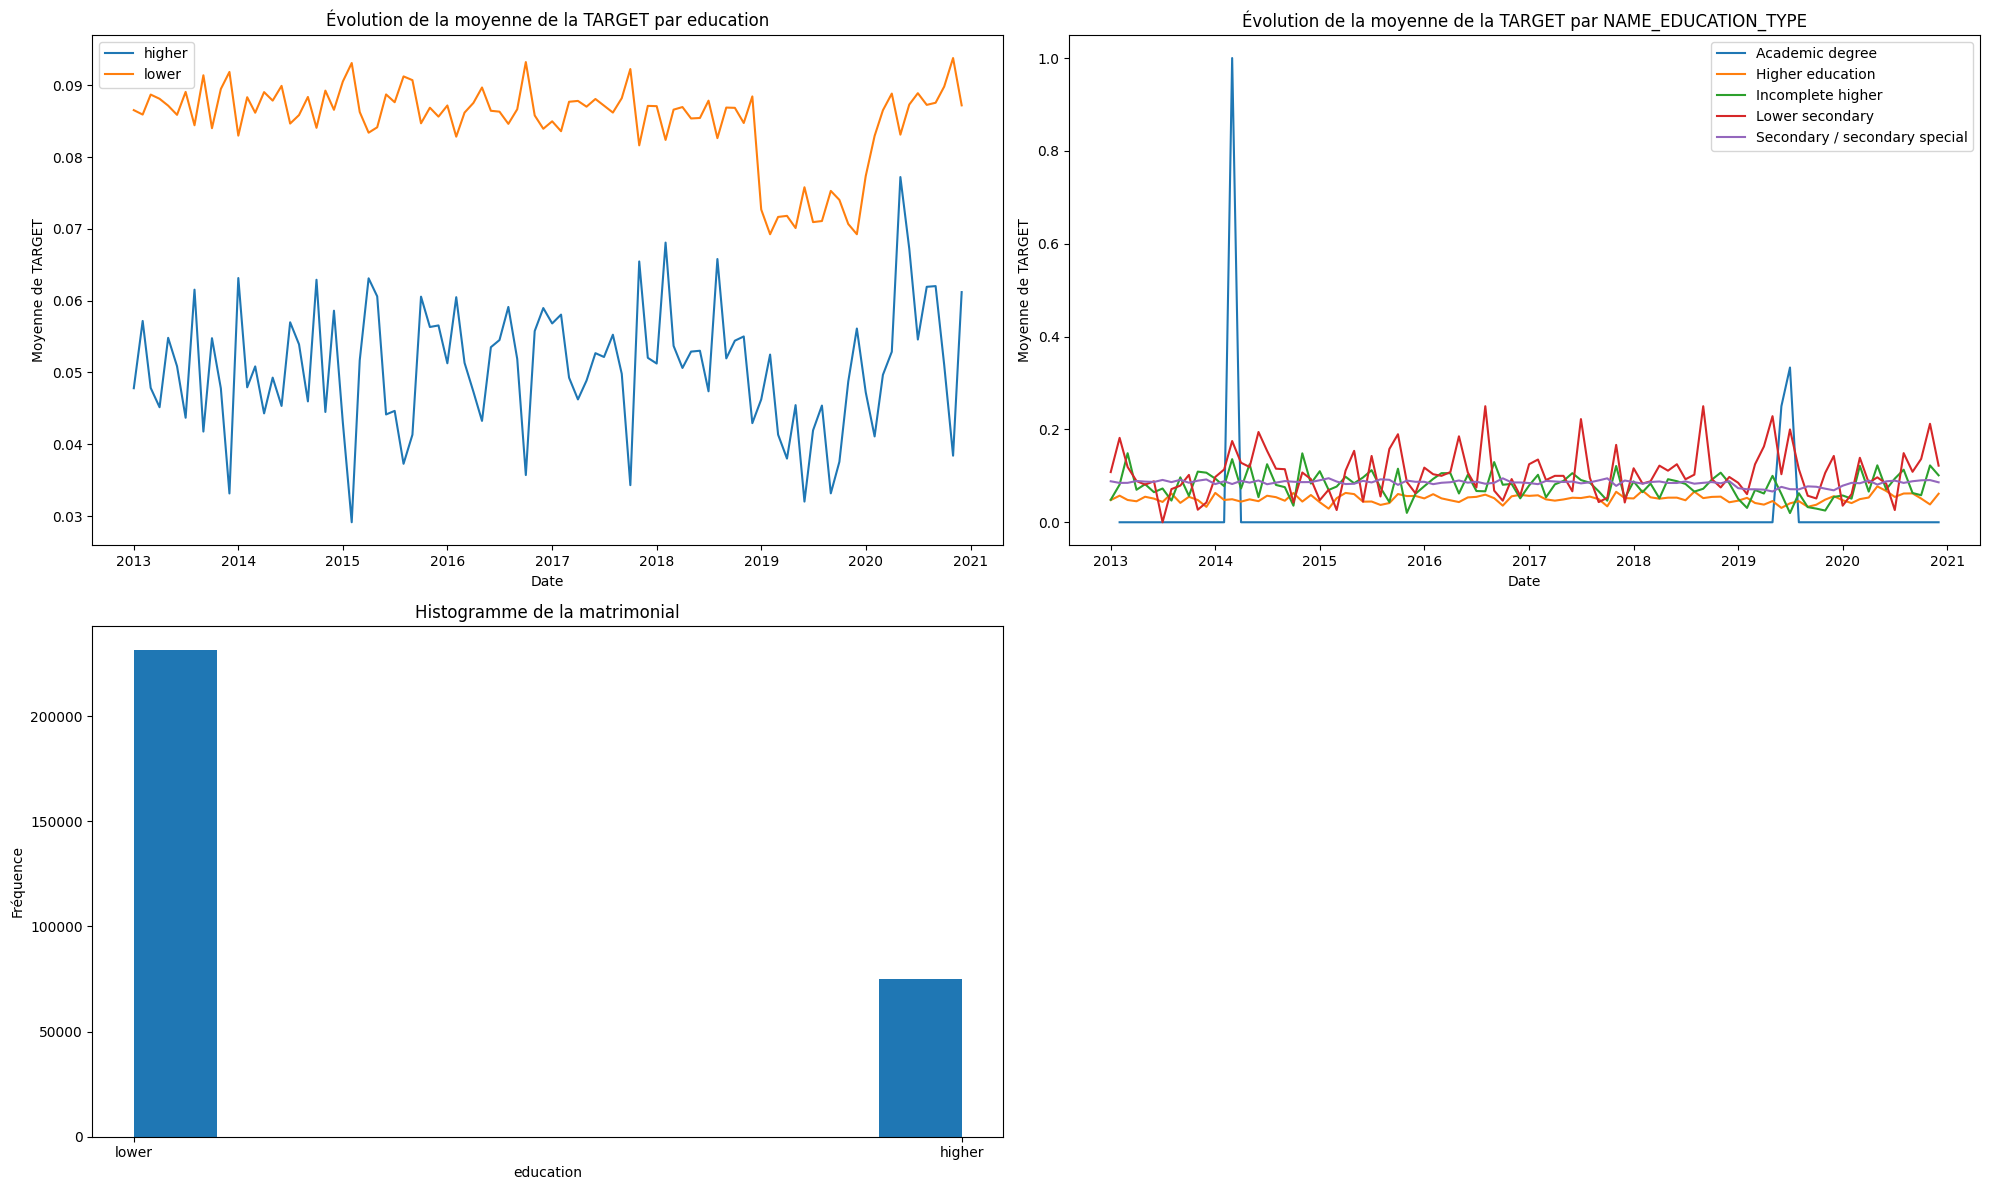

In [170]:
import matplotlib.pyplot as plt

# Création d'une grille de subplots avec 2 lignes et 2 colonnes
# Les deux premiers subplots (en haut) pour les courbes, et le troisième (en bas à gauche) pour l'histogramme
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 12))
axes[1, 1].axis('off')  # Désactiver le quatrième subplot (en bas à droite)

for idx, col in enumerate(data[['education', 'NAME_EDUCATION_TYPE']].columns):
    result = data.groupby([col, 'date_mensuelle'])['TARGET'].mean().reset_index()
   
    for genre, group in result.groupby(col):
        axes[0, idx].plot(group['date_mensuelle'], group['TARGET'], label=genre)
    
    axes[0, idx].legend()
    axes[0, idx].set_xlabel('Date')
    axes[0, idx].set_ylabel('Moyenne de TARGET')
    axes[0, idx].set_title(f'Évolution de la moyenne de la TARGET par {col}')

# Histogramme pour la 'Skilled' dans le troisième subplot (en bas à gauche)
axes[1, 0].hist(data["education"])
axes[1, 0].set_title('Histogramme de la matrimonial')
axes[1, 0].set_xlabel('education')
axes[1, 0].set_ylabel('Fréquence')

plt.tight_layout()
plt.show()


## NAME_FAMILY_STATUS

In [171]:
list_mean = []
for cat in data['NAME_FAMILY_STATUS'].unique():
    moyenne = data[data['NAME_FAMILY_STATUS']==cat]['TARGET'].mean()
    list_mean.append(moyenne)
    
motif = pd.DataFrame(list_mean, columns=['moyenne'])
motif['family'] = data['NAME_FAMILY_STATUS'].unique()
motif.sort_values(ascending=False, by = 'moyenne', inplace=True)
motif.dropna(inplace=True)
motif.reset_index(drop=True, inplace=True)
motif

moyenne                family
0  0.094162        Civil marriage
1  0.093574  Single / not married
2  0.078462             Separated
3  0.071720               Married
4  0.055784                 Widow
5  0.000000               Unknown

In [172]:
alone = ["Single / not married", "Separated","Widow", "Security staff", "Laborers"]
couple = ["Civil marriage", "Married"]
unknown = ["Unknown"]


data['matrimonial'] = np.select(
    [
        data['NAME_FAMILY_STATUS'].isin(alone),
        data['NAME_FAMILY_STATUS'].isin(couple),
        data['NAME_FAMILY_STATUS'].isin(unknown)
    ],
    ['alone', 'couple', 'unknown'],
    default='couple')

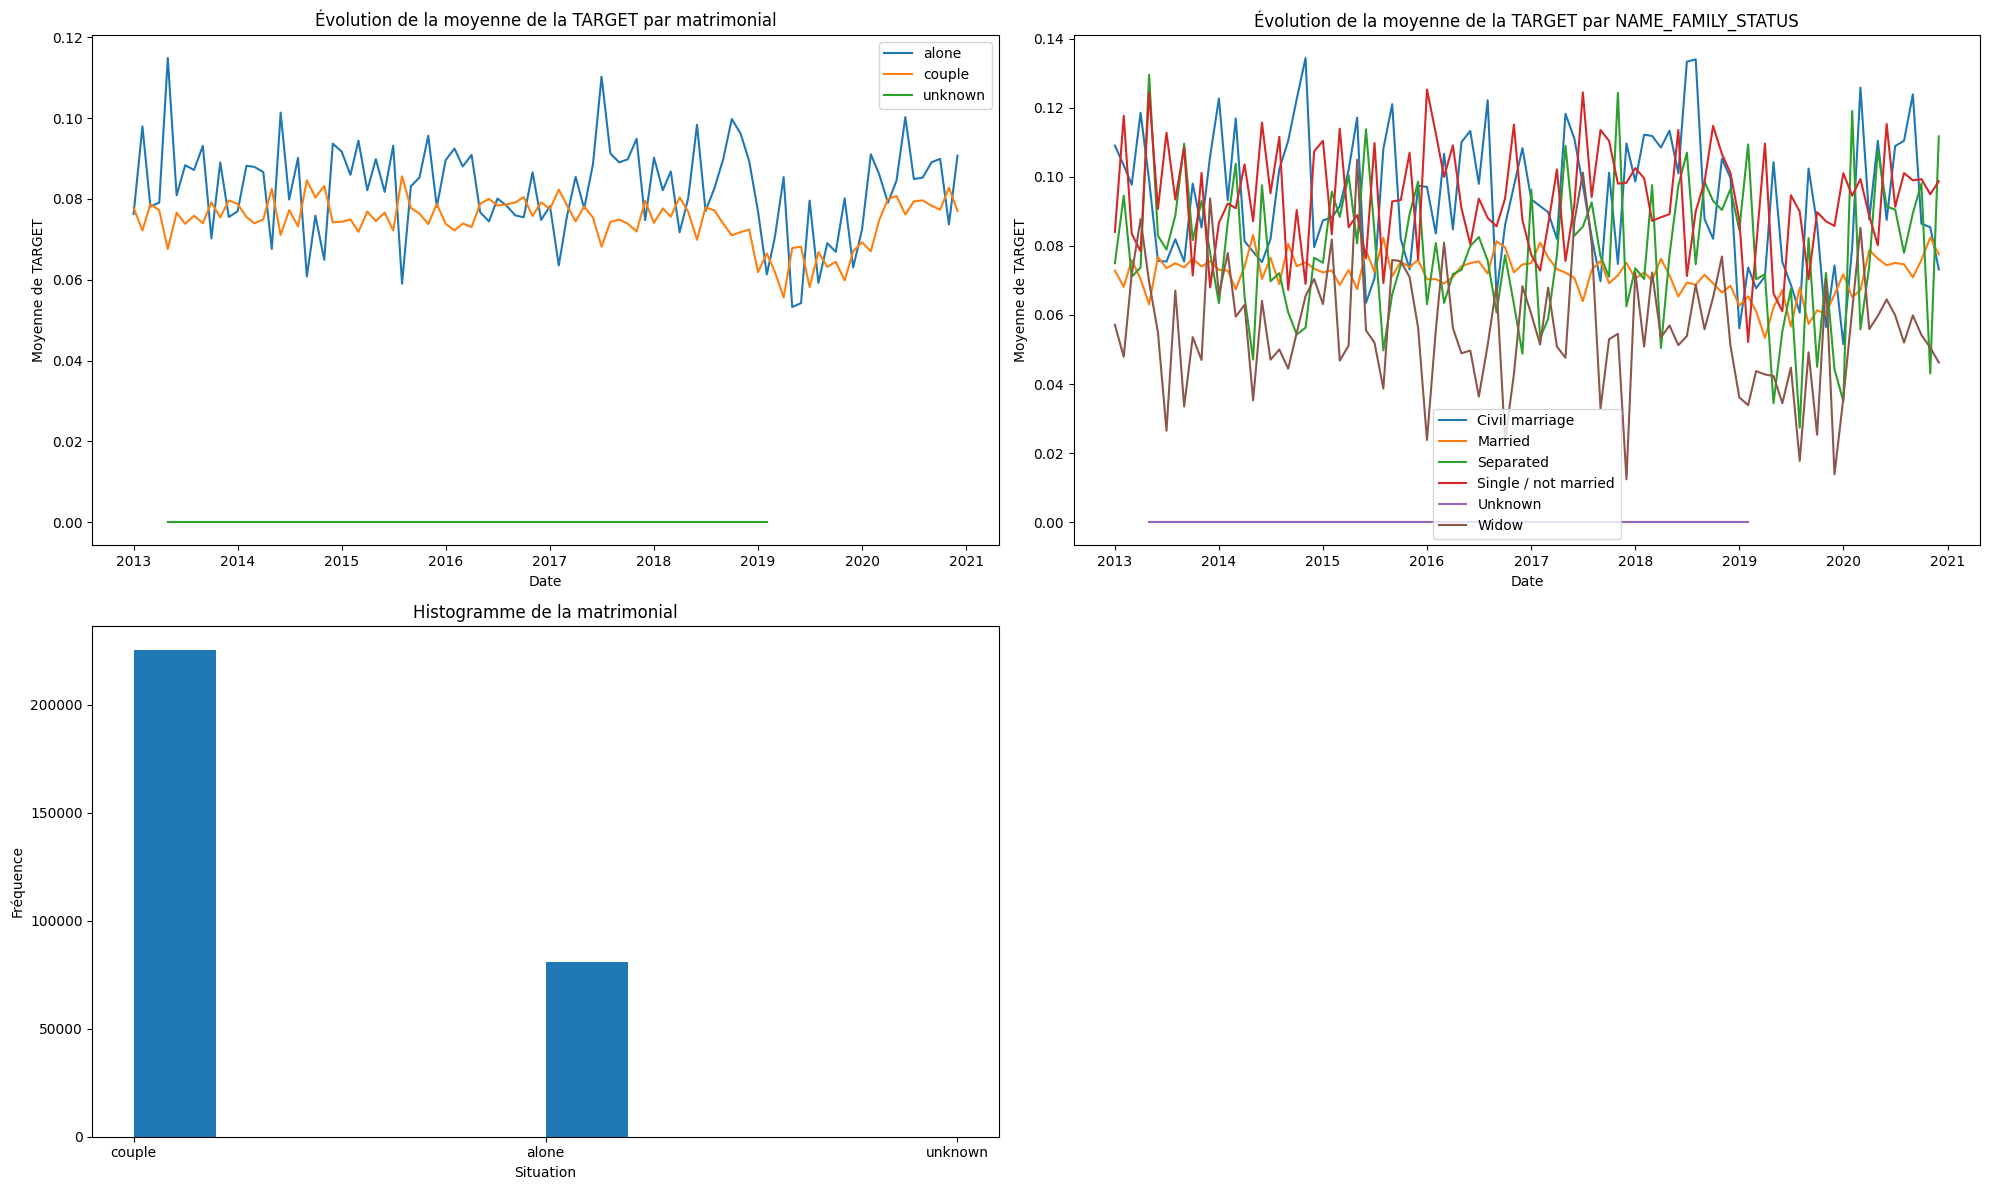

In [173]:
import matplotlib.pyplot as plt

# Création d'une grille de subplots avec 2 lignes et 2 colonnes
# Les deux premiers subplots (en haut) pour les courbes, et le troisième (en bas à gauche) pour l'histogramme
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 12))
axes[1, 1].axis('off')  # Désactiver le quatrième subplot (en bas à droite)

for idx, col in enumerate(data[['matrimonial', 'NAME_FAMILY_STATUS']].columns):
    result = data.groupby([col, 'date_mensuelle'])['TARGET'].mean().reset_index()
   
    for genre, group in result.groupby(col):
        axes[0, idx].plot(group['date_mensuelle'], group['TARGET'], label=genre)
    
    axes[0, idx].legend()
    axes[0, idx].set_xlabel('Date')
    axes[0, idx].set_ylabel('Moyenne de TARGET')
    axes[0, idx].set_title(f'Évolution de la moyenne de la TARGET par {col}')

# Histogramme pour la 'Skilled' dans le troisième subplot (en bas à gauche)
axes[1, 0].hist(data["matrimonial"])
axes[1, 0].set_title('Histogramme de la matrimonial')
axes[1, 0].set_xlabel('Situation')
axes[1, 0].set_ylabel('Fréquence')

plt.tight_layout()
plt.show()


## OCCUPATION_TYPE

In [174]:
list_mean = []
for cat in data['OCCUPATION_TYPE'].unique():
    moyenne = data[data['OCCUPATION_TYPE']==cat]['TARGET'].mean()
    list_mean.append(moyenne)
    
motif = pd.DataFrame(list_mean, columns=['moyenne'])
motif['family'] = data['OCCUPATION_TYPE'].unique()
motif.sort_values(ascending=False, by = 'moyenne', inplace=True)
motif.dropna(inplace=True)
motif.reset_index(drop=True, inplace=True)
motif

moyenne                 family
0   0.163127     Low-skill Laborers
1   0.107811                Drivers
2   0.105460   Waiters/barmen staff
3   0.101827         Security staff
4   0.100789               Laborers
5   0.099797          Cooking staff
6   0.091405            Sales staff
7   0.090240         Cleaning staff
8   0.074866          Realty agents
9   0.066923            Secretaries
10  0.063720         Medicine staff
11  0.062857               IT staff
12  0.062098  Private service staff
13  0.059924             Core staff
14  0.059155               Managers
15  0.058929               HR staff
16  0.057811  High skill tech staff
17  0.045589            Accountants

In [175]:
low_skilled = ["Low-skill Laborers", "Drivers","Waiters/barmen staff", "Security staff", "Laborers"]
middle_skilled = ["Sales staff", "Cooking staff", "Cleaning staff", "Realty agents", "Secretaries"]
high_skilled = ["Medicine staff", "IT staff", "Private service staff", "Managers", "Core staff", "HR staff", "Accountants", "High skilled tech staff"]


data['Skilled'] = np.select(
    [
        data['OCCUPATION_TYPE'].isin(low_skilled),
        data['OCCUPATION_TYPE'].isin(middle_skilled),
        data['OCCUPATION_TYPE'].isin(high_skilled)
    ],
    ['low_skilled', 'middle_skilled', 'high_skilled'],
    default='middle_skilled')

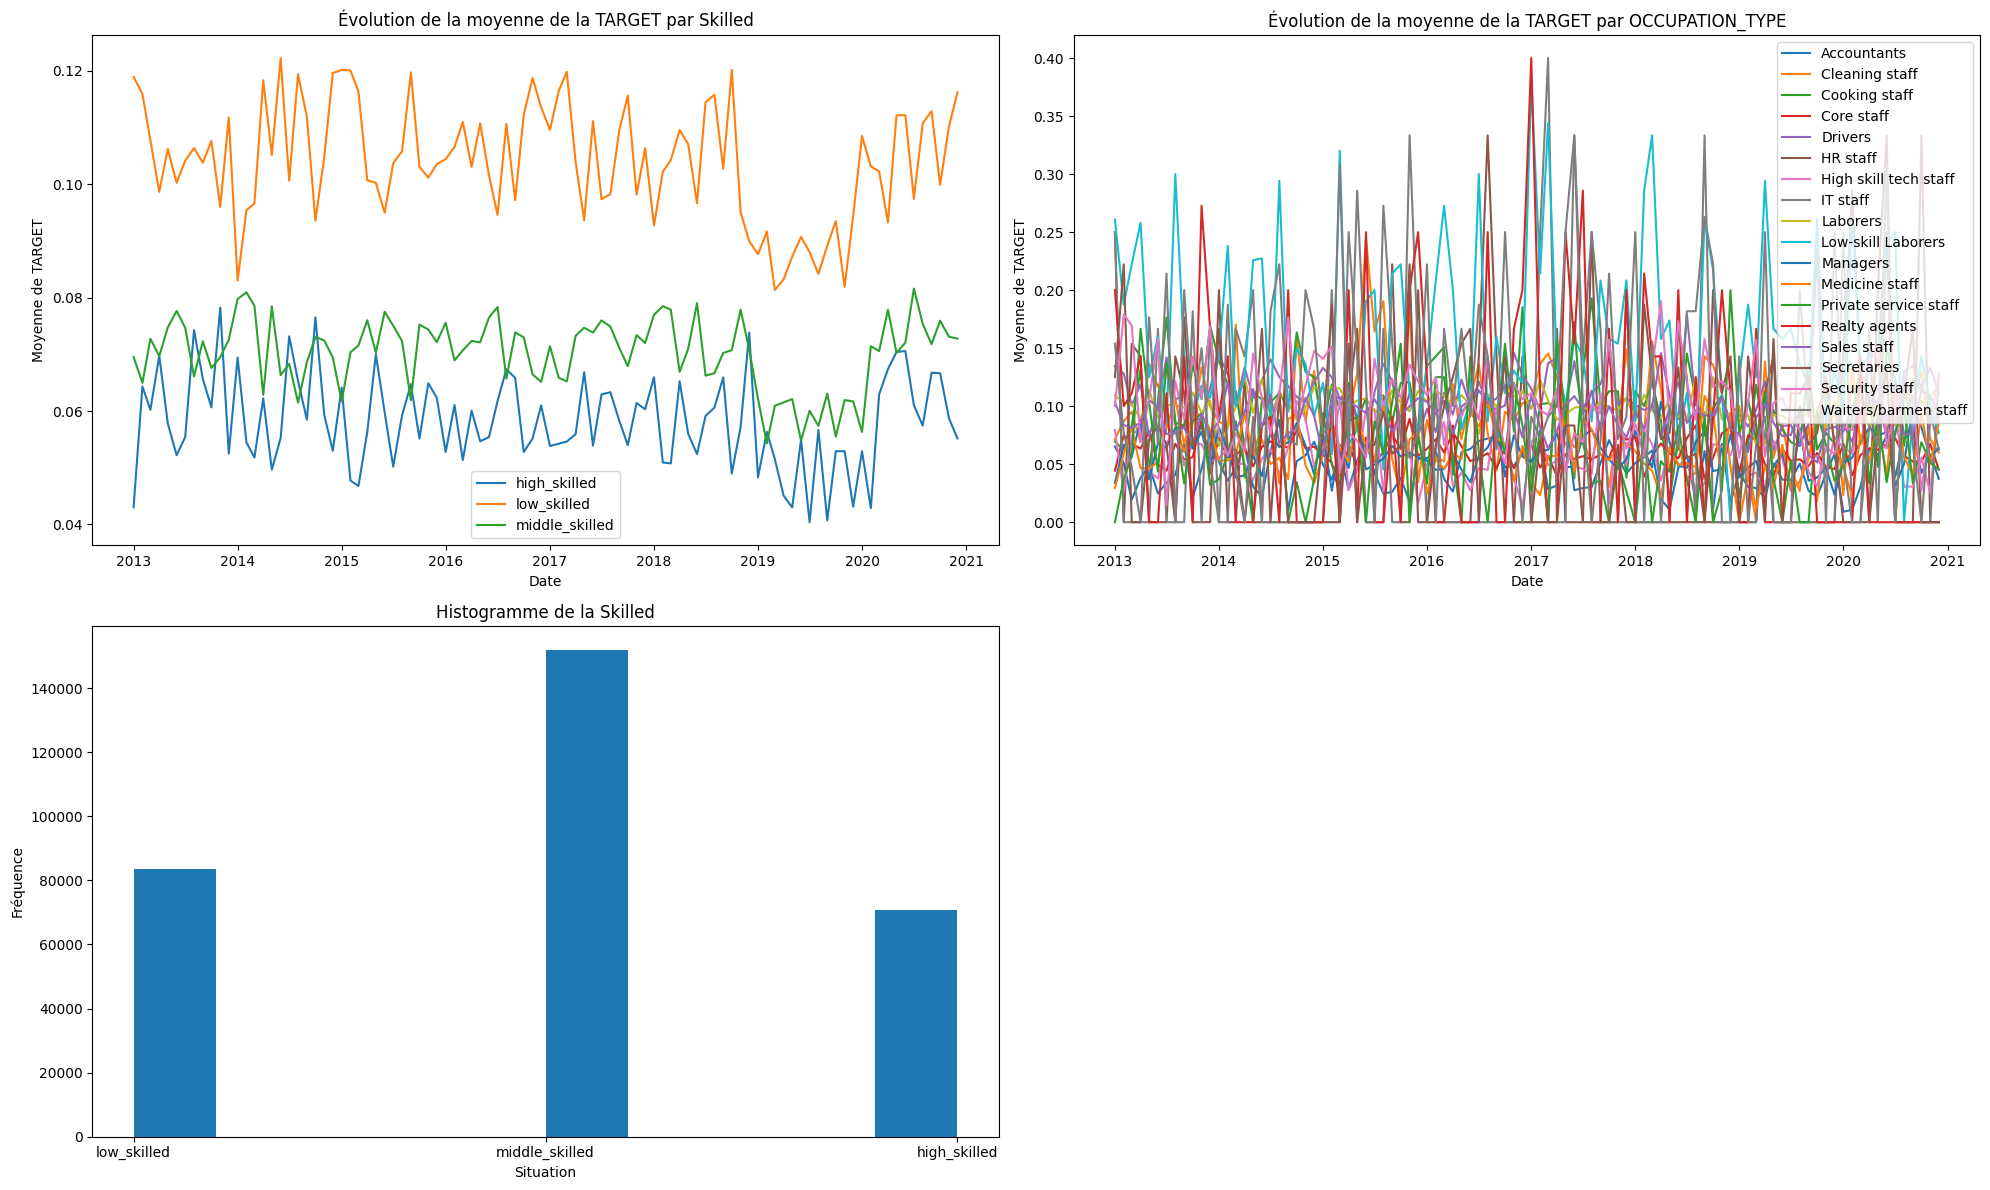

In [176]:
import matplotlib.pyplot as plt

# Création d'une grille de subplots avec 2 lignes et 2 colonnes
# Les deux premiers subplots (en haut) pour les courbes, et le troisième (en bas à gauche) pour l'histogramme
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 12))
axes[1, 1].axis('off')  # Désactiver le quatrième subplot (en bas à droite)

for idx, col in enumerate(data[['Skilled', 'OCCUPATION_TYPE']].columns):
    result = data.groupby([col, 'date_mensuelle'])['TARGET'].mean().reset_index()
   
    for genre, group in result.groupby(col):
        axes[0, idx].plot(group['date_mensuelle'], group['TARGET'], label=genre)
    
    axes[0, idx].legend()
    axes[0, idx].set_xlabel('Date')
    axes[0, idx].set_ylabel('Moyenne de TARGET')
    axes[0, idx].set_title(f'Évolution de la moyenne de la TARGET par {col}')

# Histogramme pour la 'Skilled' dans le troisième subplot (en bas à gauche)
axes[1, 0].hist(data["Skilled"])
axes[1, 0].set_title('Histogramme de la Skilled')
axes[1, 0].set_xlabel('Situation')
axes[1, 0].set_ylabel('Fréquence')

plt.tight_layout()
plt.show()


## NAME_HOUSING_TYPE

In [177]:
list_mean = []
for cat in data['NAME_HOUSING_TYPE'].unique():
    moyenne = data[data['NAME_HOUSING_TYPE']==cat]['TARGET'].mean()
    list_mean.append(moyenne)
    
motif = pd.DataFrame(list_mean, columns=['moyenne'])
motif['housing'] = data['NAME_HOUSING_TYPE'].unique()
motif.sort_values(ascending=False, by = 'moyenne', inplace=True)
motif.dropna(inplace=True)
motif.reset_index(drop=True, inplace=True)
motif

moyenne              housing
0  0.118277     Rented apartment
1  0.110772         With parents
2  0.080831  Municipal apartment
3  0.076029      Co-op apartment
4  0.074103    House / apartment
5  0.061781     Office apartment

## WEEKDAY_APPR_PROCESS_START

In [178]:
list_mean = []
for cat in data['WEEKDAY_APPR_PROCESS_START'].unique():
    moyenne = data[data['WEEKDAY_APPR_PROCESS_START']==cat]['TARGET'].mean()
    list_mean.append(moyenne)
    
motif = pd.DataFrame(list_mean, columns=['moyenne'])
motif['weekday'] = data['WEEKDAY_APPR_PROCESS_START'].unique()
motif.sort_values(ascending=False, by = 'moyenne', inplace=True)
motif.dropna(inplace=True)
motif.reset_index(drop=True, inplace=True)
motif

moyenne    weekday
0  0.080042    TUESDAY
1  0.077367  WEDNESDAY
2  0.077049     FRIDAY
3  0.076853   THURSDAY
4  0.075548     SUNDAY
5  0.075008   SATURDAY
6  0.073552     MONDAY

In [179]:
weekdays = ["MONDAY", "TUESDAY", "WEDNESDAY", "THURSDAY", "FRIDAY"]
weekends = ["SATURDAY", "SUNDAY"]

data['days'] = np.select(
    [
        data['WEEKDAY_APPR_PROCESS_START'].isin(weekdays),
        data['WEEKDAY_APPR_PROCESS_START'].isin(weekends),
        # data['WEEKDAY_APPR_PROCESS_START'].isin(high_skilled)
    ],
    ['weekdays', 'weekends'],
    default='weekdays')

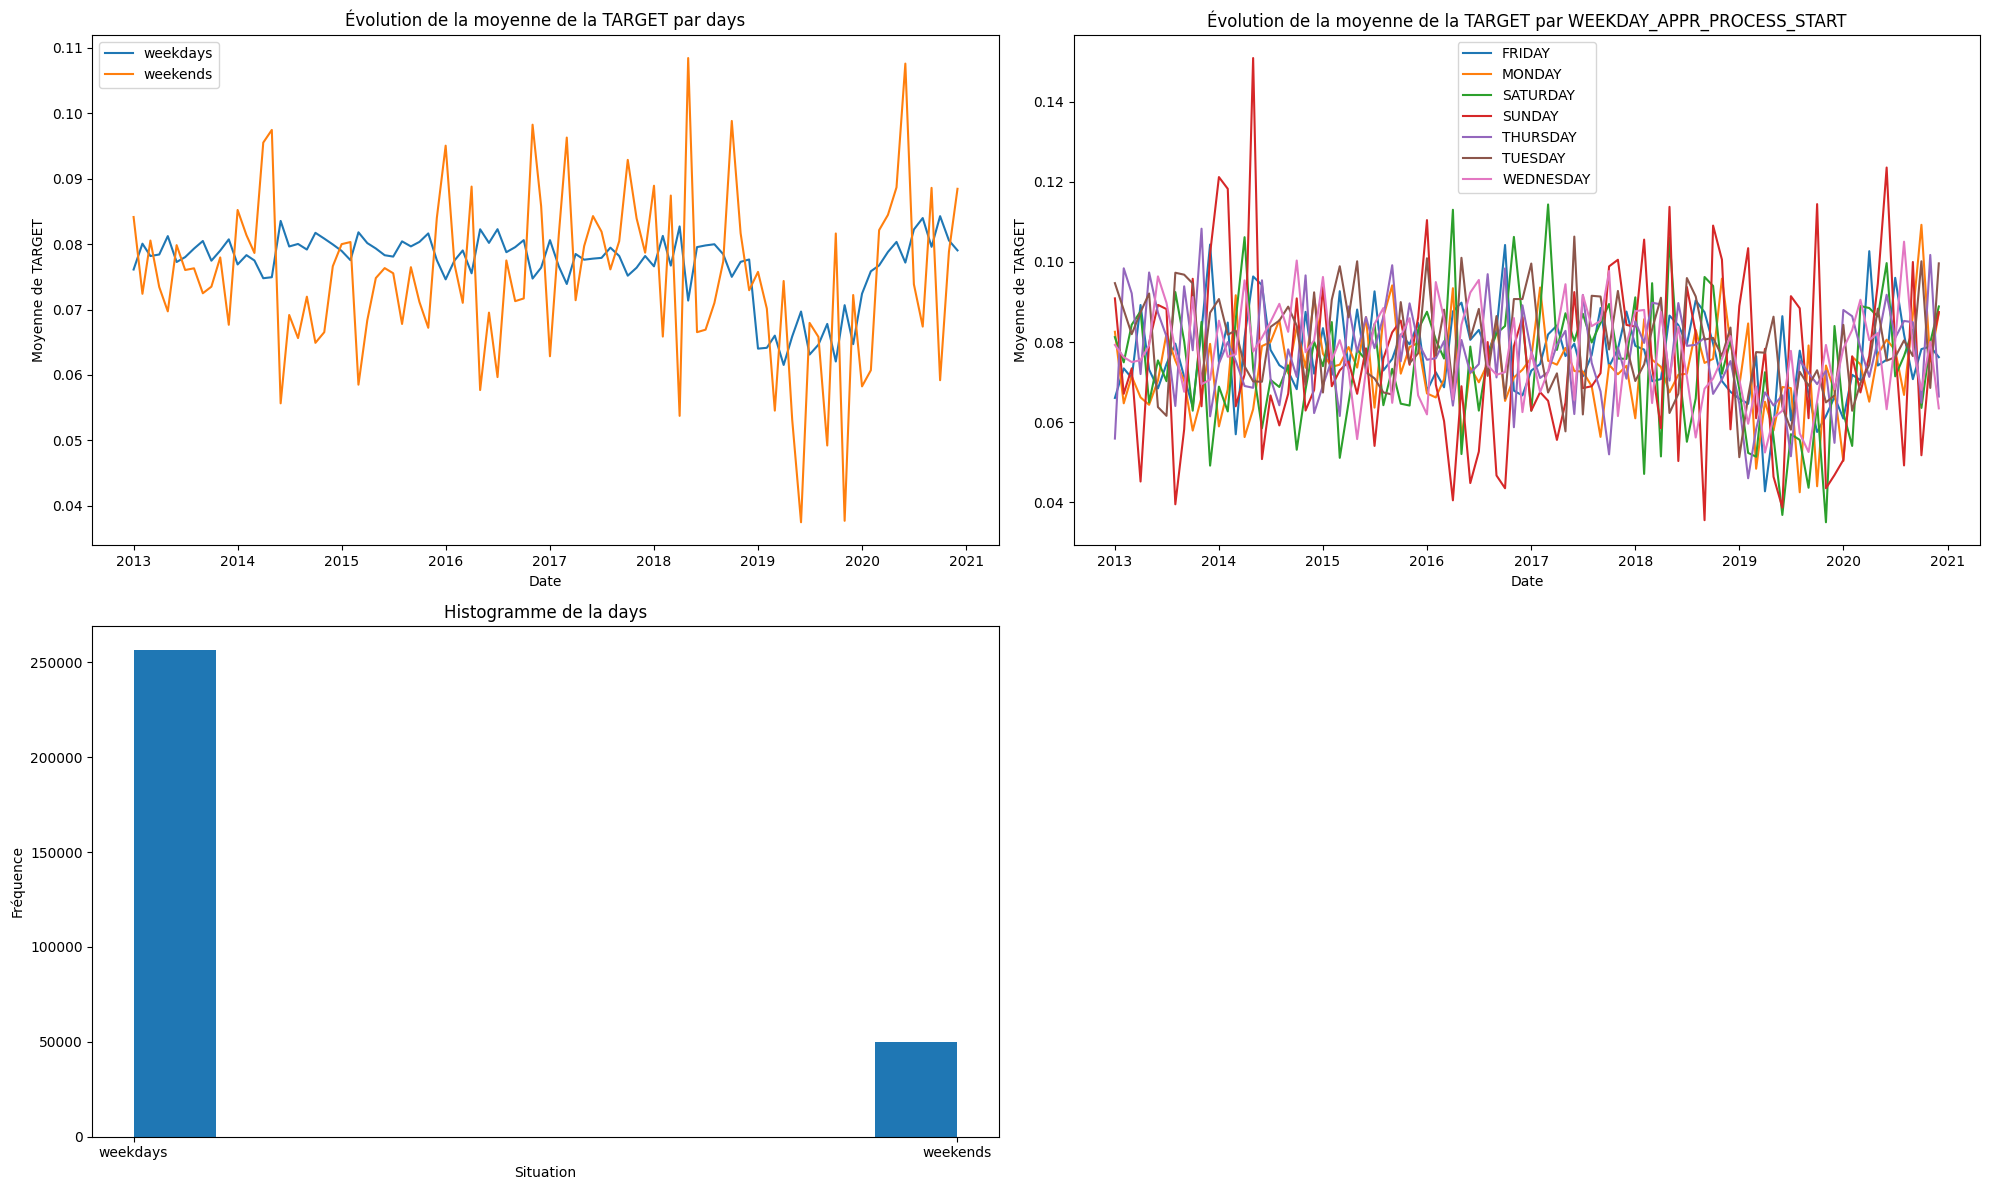

In [180]:
import matplotlib.pyplot as plt

# Création d'une grille de subplots avec 2 lignes et 2 colonnes
# Les deux premiers subplots (en haut) pour les courbes, et le troisième (en bas à gauche) pour l'histogramme
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 12))
axes[1, 1].axis('off')  # Désactiver le quatrième subplot (en bas à droite)

for idx, col in enumerate(data[['days', 'WEEKDAY_APPR_PROCESS_START']].columns):
    result = data.groupby([col, 'date_mensuelle'])['TARGET'].mean().reset_index()
   
    for genre, group in result.groupby(col):
        axes[0, idx].plot(group['date_mensuelle'], group['TARGET'], label=genre)
    
    axes[0, idx].legend()
    axes[0, idx].set_xlabel('Date')
    axes[0, idx].set_ylabel('Moyenne de TARGET')
    axes[0, idx].set_title(f'Évolution de la moyenne de la TARGET par {col}')

# Histogramme pour la 'days' dans le troisième subplot (en bas à gauche)
axes[1, 0].hist(data["days"])
axes[1, 0].set_title('Histogramme de la days')
axes[1, 0].set_xlabel('Situation')
axes[1, 0].set_ylabel('Fréquence')

plt.tight_layout()
plt.show()


VARS QUE L'ON TOUCHE PAS :
- NAME_CONTRACT_TYPE
- CODE_GENDER
- FLAG_OWN_CAR

CATEGORIELLES A POTENTIELLEMENT GARDER APRES DISCRETISATION : 
- NAME_EDUCATION_TYPE (attention à la distribution)
- OCCUPATION_TYPE (attention aux croisements)

CATEGORIELLES A DEGAGER :
- WEEKDAY_APPR_PROCESS_START
- NAME_FAMILY_STATUS
- NAME_INCOME_TYPE
- NAME_TYPE_SUITE

In [181]:
data.drop(columns=["WEEKDAY_APPR_PROCESS_START", "NAME_FAMILY_STATUS", "NAME_INCOME_TYPE", "NAME_TYPE_SUITE"],
          axis=1, inplace=True
          )

## DISCRETISATION DES VARIABLES NUMERIQUES

In [182]:
print(data.columns)
print(len(data.columns))

Index(['date_mensuelle', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_EDUCATION_TYPE',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE',
       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'TARGET',
       'Situation', 'INCOME', 'education', 'matrimonial', 'Skilled', 'days'],
      dtype='object')
35


In [183]:
for i in data.select_dtypes(include=['float64', 'int64']).columns:
    if data[i].isna().sum() / len(data[i]) * 100 > 30:
        print(i, data[i].isna().sum() / len(data[i]) * 100)
        data.drop(columns = i, axis = 1, inplace= True)
    else : data[i].fillna(data[i].mode()[0], inplace = True)

OWN_CAR_AGE 65.97758300202217


/var/folders/cs/hh3_26_57sx7l8sdk574zbdh0000gn/T/ipykernel_32778/1912940387.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  else : data[i].fillna(data[i].mode()[0], inplace = True)
/var/folders/cs/hh3_26_57sx7l8sdk574zbdh0000gn/T/ipykernel_32778/1912940387.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting val

In [184]:
print(data.columns)
print(len(data.columns))

Index(['date_mensuelle', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_EDUCATION_TYPE',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'TARGET',
       'Situation', 'INCOME', 'education', 'matrimonial', 'Skilled', 'days'],
      dtype='object')
34


In [186]:
variables_unique_counts = data.select_dtypes(include=['float64', 'int64']).nunique().sort_values(ascending=False)
variables_to_cluster = variables_unique_counts[variables_unique_counts > 1]
variables_unique_counts

DAYS_BIRTH                     17460
DAYS_REGISTRATION              15687
AMT_ANNUITY                    13667
DAYS_EMPLOYED                  12571
DAYS_ID_PUBLISH                 6168
AMT_CREDIT                      5597
AMT_INCOME_TOTAL                2545
AMT_GOODS_PRICE                 1000
REGION_POPULATION_RELATIVE        81
CNT_FAM_MEMBERS                   17
CNT_CHILDREN                      15
REGION_RATING_CLIENT_W_CITY        3
REGION_RATING_CLIENT               3
FLAG_EMAIL                         2
FLAG_MOBIL                         2
FLAG_PHONE                         2
FLAG_CONT_MOBILE                   2
FLAG_WORK_PHONE                    2
FLAG_EMP_PHONE                     2
TARGET                             2
dtype: int64

## CNT_FAM_MEMBERS

In [188]:
data["CNT_FAM_MEMBERS"].unique()

array([ 3.,  2.,  4.,  1.,  5.,  6., 14.,  7.,  8., 12., 11.,  9., 15.,
       16., 10., 13., 20.])

In [191]:
data[data["CNT_FAM_MEMBERS"]==20]

date_mensuelle NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
220846     2018-10-01         Cash loans           F            N   
241629     2019-04-01         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
220846               Y            19          112500.0    269550.0   
241629               Y            19          112500.0    135000.0   

        AMT_ANNUITY  AMT_GOODS_PRICE  ... REGION_RATING_CLIENT  \
220846      13891.5         225000.0  ...                    2   
241629       8788.5         135000.0  ...                    2   

       REGION_RATING_CLIENT_W_CITY  TARGET  Situation       INCOME  education  \
220846                           2       0  not_alone  high_income      lower   
241629                           2       0      alone  high_income     higher   

        matrimonial       Skilled      days  Couleur  
220846        alone   low_skilled  weekends     blue  
241629        alone  high_skilled  weekdays     blue  

[2 rows x 35 columns]

In [197]:
list_mean = []
for cat in data['CNT_FAM_MEMBERS'].unique():
    moyenne = data[data['CNT_FAM_MEMBERS']==cat]['TARGET'].mean()
    list_mean.append(moyenne)
    
motif = pd.DataFrame(list_mean, columns=['moyenne'])
motif['FAM'] = data['CNT_FAM_MEMBERS'].unique()
motif.sort_values(ascending=False, by = 'moyenne', inplace=True)
motif.dropna(inplace=True)
motif.reset_index(drop=True, inplace=True)
res = motif.sort_values(ascending=True, by = "FAM")
res.reset_index(drop=True, inplace=True )
res

moyenne   FAM
0   0.079948   1.0
1   0.071937   2.0
2   0.083193   3.0
3   0.081824   4.0
4   0.089884   5.0
5   0.126238   6.0
6   0.074074   7.0
7   0.263158   8.0
8   0.000000   9.0
9   0.333333  10.0
10  1.000000  11.0
11  0.000000  12.0
12  1.000000  13.0
13  0.000000  14.0
14  0.000000  15.0
15  0.000000  16.0
16  0.000000  20.0

In [207]:
un_a_5 = [1.0, 2.0, 3.0, 4.0, 5.0]
six_a_10 = [6.0, 7.0, 8.0, 9.0, 10.0]
onze_a_15 = [11.0, 12.0, 13.0, 14.0, 15.0]
seize_a_20 = [16.0, 17.0, 18.0, 19.0, 20.0]
data['FAM'] = np.select(
    [
        data['CNT_FAM_MEMBERS'].isin(un_a_5),
        data['CNT_FAM_MEMBERS'].isin(six_a_10),
        data['CNT_FAM_MEMBERS'].isin(onze_a_15),
        data['CNT_FAM_MEMBERS'].isin(seize_a_20),
        # data['CNT_FAM_MEMBERS'].isin(high_skilled)
    ],
    ["un_a_5", "six_a_10", "onze_a_15", "seize_a_20"],
    default='un_a_5')

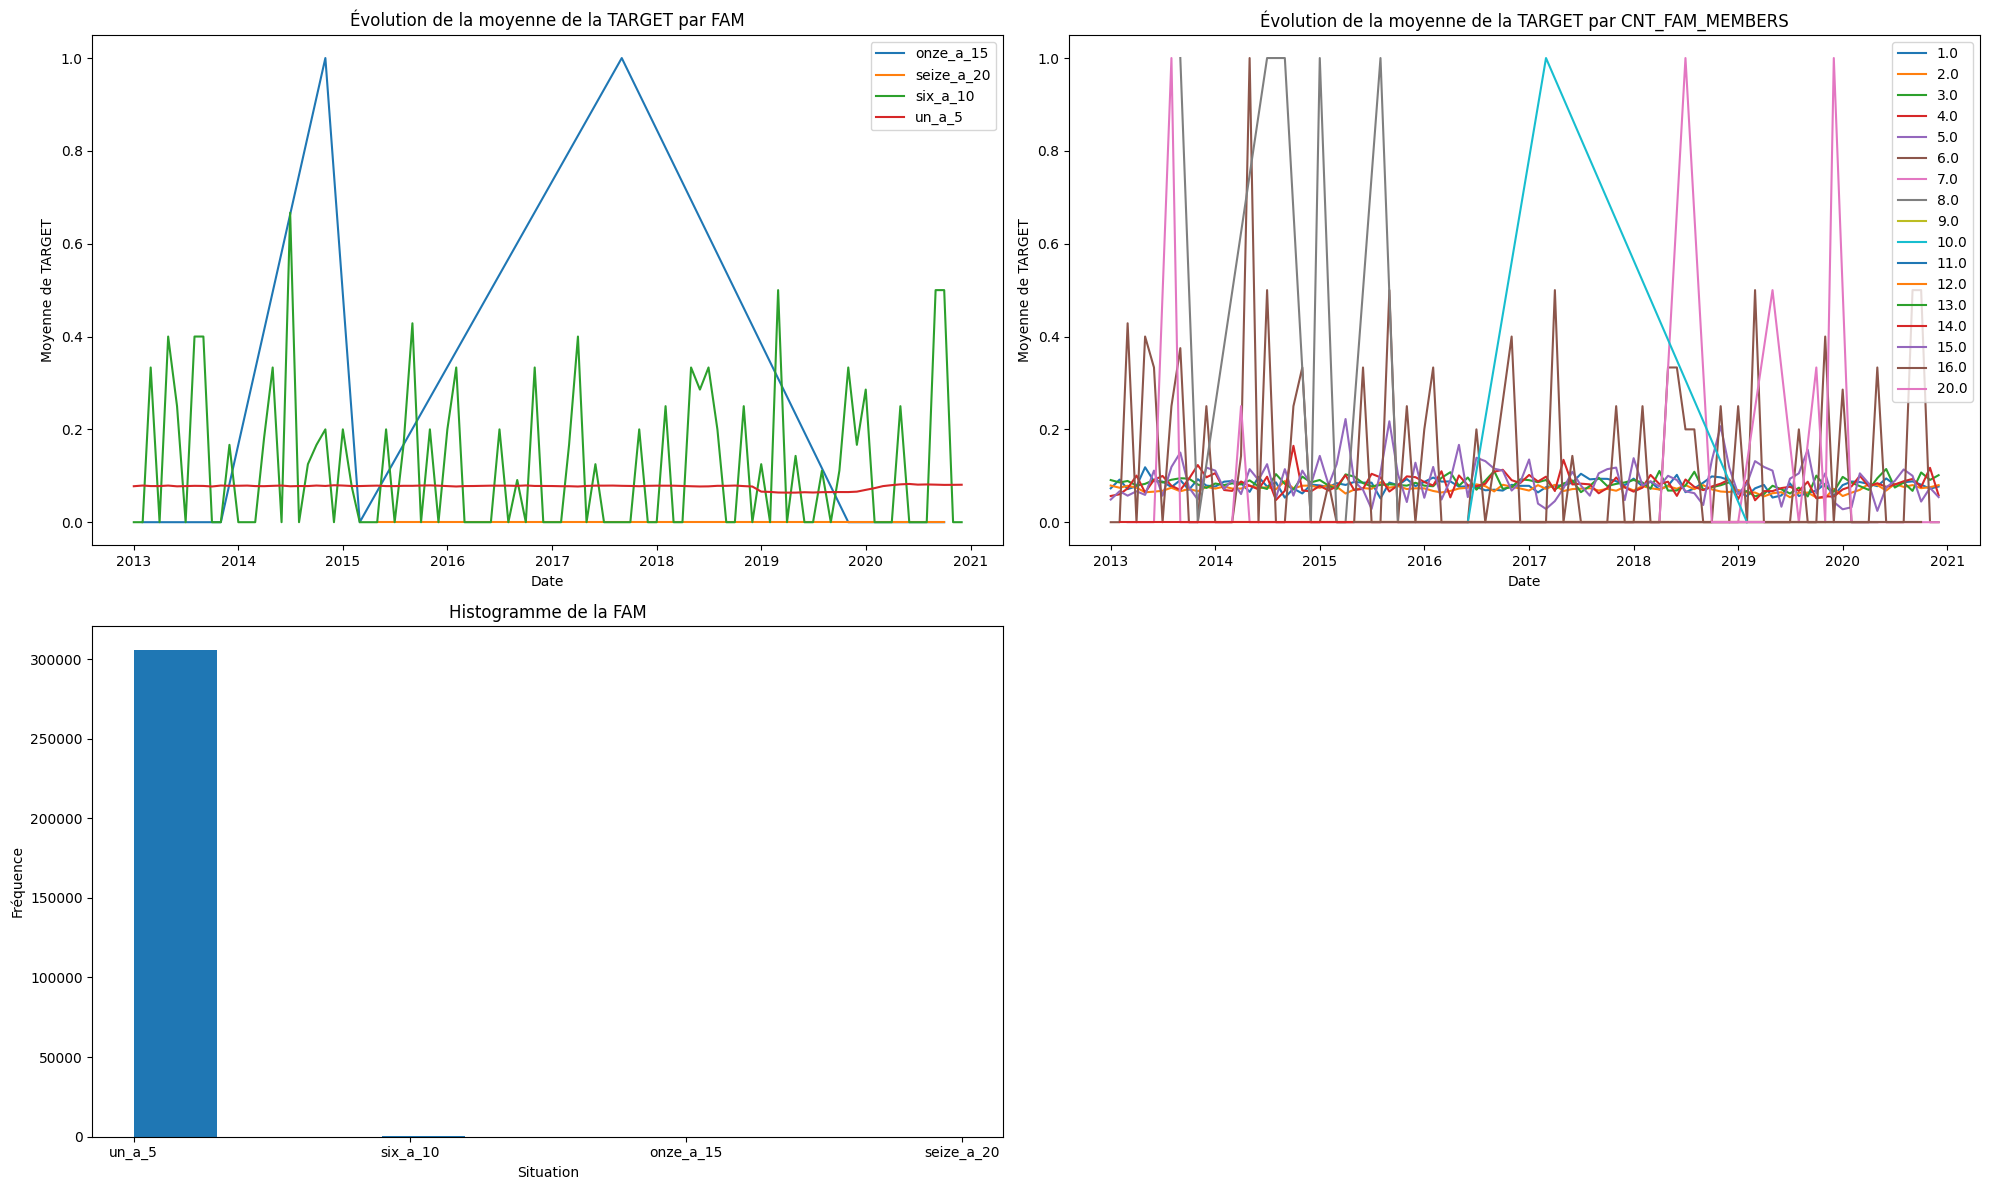

In [208]:
import matplotlib.pyplot as plt


fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 12))
axes[1, 1].axis('off')  # Désactiver le quatrième subplot (en bas à droite)

for idx, col in enumerate(data[['FAM', 'CNT_FAM_MEMBERS']].columns):
    result = data.groupby([col, 'date_mensuelle'])['TARGET'].mean().reset_index()
   
    for genre, group in result.groupby(col):
        axes[0, idx].plot(group['date_mensuelle'], group['TARGET'], label=genre)
    
    axes[0, idx].legend()
    axes[0, idx].set_xlabel('Date')
    axes[0, idx].set_ylabel('Moyenne de TARGET')
    axes[0, idx].set_title(f'Évolution de la moyenne de la TARGET par {col}')

# Histogramme pour la 'FAM' dans le troisième subplot (en bas à gauche)
axes[1, 0].hist(data["FAM"])
axes[1, 0].set_title('Histogramme de la FAM')
axes[1, 0].set_xlabel('Situation')
axes[1, 0].set_ylabel('Fréquence')

plt.tight_layout()
plt.show()


## CNT_CHILDREN

In [209]:
data["CNT_CHILDREN"].unique()

array([ 1,  0,  2,  3,  4, 12,  5,  6, 10,  9,  7, 14,  8, 11, 19])

In [211]:
list_mean = []
for cat in data['CNT_CHILDREN'].unique():
    moyenne = data[data['CNT_CHILDREN']==cat]['TARGET'].mean()
    list_mean.append(moyenne)
    
motif = pd.DataFrame(list_mean, columns=['moyenne'])
motif['CHILDREN'] = data['CNT_CHILDREN'].unique()
motif.sort_values(ascending=False, by = 'moyenne', inplace=True)
motif.dropna(inplace=True)
motif.reset_index(drop=True, inplace=True)
res = motif.sort_values(ascending=True, by = "CHILDREN")
res.reset_index(drop=True, inplace=True )
res

moyenne  CHILDREN
0   0.073307         0
1   0.084941         1
2   0.082296         2
3   0.092457         3
4   0.120000         4
5   0.083333         5
6   0.250000         6
7   0.000000         7
8   0.000000         8
9   1.000000         9
10  0.000000        10
11  1.000000        11
12  0.000000        12
13  0.000000        14
14  0.000000        19